# Let's Figure out the best process
#### Complete an Explorative Data Analysis
#### Build a TensorFlow model
#### Visualize and Analysis the differences in the models



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ramneekc/DengAI/blob/master/TensorFlow/DengAI.ipynb)


# **DengAI: Predicting Disease Spread**

In [1]:
# Source Data
TRAIN_FEATURES_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv"
TRAIN_LABELS_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv"
TEST_FEATURES_URL = "https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_test.csv"

# Explorative Data Analysis


In [2]:
# !pip install --upgrade matplotlib

In [3]:
# !pip install --upgrade seaborn

In [4]:
# !pip install --upgrade numpy

In [5]:
# !pip install --upgrade pandas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.__version__,np.__version__

('1.0.3', '1.18.1')

#### Set index to [city, year, weekofyear] per the competition instructions
##### maybe we should separate the DataFrames by city **DONE**
##### also we could use an arbitrary index for the modeling and then apply the MultiIndex to the submission data
# Switch index to week_start_date for time-series
## merge features_df and labels_df on current index and then reindex on week_start_date then pop out total_cases for labels

In [8]:
# ,index_col=['city','year','weekofyear']

train_features_df = pd.read_csv(TRAIN_FEATURES_URL,index_col=['city','year','weekofyear'])
train_labels_df = pd.read_csv(TRAIN_LABELS_URL,index_col=['city','year','weekofyear'])
# test_features_df = pd.read_csv(TEST_FEATURES_URL,index_col=['city','year','weekofyear'])

In [9]:
train_features_df.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [10]:
train_features_df.loc[:,'week_start_date'] = train_features_df.loc[:,'week_start_date'].astype('datetime64[ns]')
train_features_df.dtypes

C:\Users\bryan\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:2858: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           float64
reanalysis_tdtr_k                               float64
station_avg_temp_c                              float64
station_diur_temp_rng_c                         

In [11]:
train_labels_df.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

In [12]:
train_labels_df.dtypes

total_cases    int64
dtype: object

In [13]:
# test_features_df.head()

In [14]:
# test_features_df.dtypes

In [15]:
# Seperate train data for San Juan
sj_train_features = train_features_df.loc['sj']
sj_train_labels = train_labels_df.loc['sj']

# Separate train data for Iquitos
iq_train_features = train_features_df.loc['iq']
iq_train_labels = train_labels_df.loc['iq']

# Seperate test data for San Juan
# sj_test_features = test_features_df.loc['sj']

# Separate test data for Iquitos
# iq_test_features = test_features_df.loc['iq']

In [16]:
print("San Juan number of Features: {}, Labels: {}".format(len(sj_train_features),len(sj_train_labels)))
print("Iquitos number of Features: {}, Labels: {}".format(len(iq_train_features),len(iq_train_labels)))

San Juan number of Features: 936, Labels: 936
Iquitos number of Features: 520, Labels: 520


In [17]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [18]:
sj_train_labels.head()

total_cases
year weekofyear             
1990 18                    4
     19                    5
     20                    4
     21                    3
     22                    6

In [19]:
# sj_test_features.head()

In [20]:
iq_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
2000 26              2000-07-01  0.192886  0.132257  0.340886  0.247200   
     27              2000-07-08  0.216833  0.276100  0.289457  0.241657   
     28              2000-07-15  0.176757  0.173129  0.204114  0.128014   
     29              2000-07-22  0.227729  0.145429  0.254200  0.200314   
     30              2000-07-29  0.328643  0.322129  0.254371  0.361043   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2000 26                         25.41             296.740000   
     27                         60.61             296.634286   
     28                         55.52             296.415714   
     29                          5.60             295.357143   
     30                         62.76             296.432857   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
2000 26                     298.450000                   295.184286   
     27                     298.428571                   295.358571   
     28                     297.392857                   295.622857   
     29                     296.228571                   292.797143   
     30                     297.635714                   293.957143   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
2000 26                              307.3  ...   
     27                              306.6  ...   
     28                              304.5  ...   
     29                              303.6  ...   
     30                              307.0  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
2000 26                                    43.19   
     27                                    46.00   
     28                                    64.77   
     29                                    23.96   
     30                                    31.80   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
2000 26                                     92.418571   
     27                                     93.581429   
     28                                     95.848571   
     29                                     87.234286   
     30                                     88.161429   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
2000 26                                 25.41   
     27                                 60.61   
     28                                 55.52   
     29                                  5.60   
     30                                 62.76   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
2000 26                                      16.651429           8.928571   
     27                                      16.862857          10.314286   
     28                                      17.120000           7.385714   
     29                                      14.431429           9.114286   
     30                                      15.444286           9.500000   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
2000 26                   26.400000                10.775000   
     27                   26.900000                11.566667   
     28                   26.800000                11.466667   
     29                   25.766667                10.533333   
     30                   26.600000                11.480000   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [21]:
iq_train_labels.head()

total_cases
year weekofyear             
2000 26                    0
     27                    0
     28                    0
     29                    0
     30                    0

In [22]:
# iq_test_features.head()

In [23]:
sj_train_labels.index = sj_train_labels.index.to_flat_index()

In [24]:
sj_train_labels.head()

total_cases
(1990, 18)            4
(1990, 19)            5
(1990, 20)            4
(1990, 21)            3
(1990, 22)            6

In [25]:
sj_train_features.index = sj_train_features.index.to_flat_index()

In [26]:
# sj_test_features.index = sj_test_features.index.to_flat_index()

In [27]:
iq_train_labels.index = iq_train_labels.index.to_flat_index()

In [28]:
iq_train_features.index = iq_train_features.index.to_flat_index()

In [29]:
# iq_test_features.index = iq_test_features.index.to_flat_index()

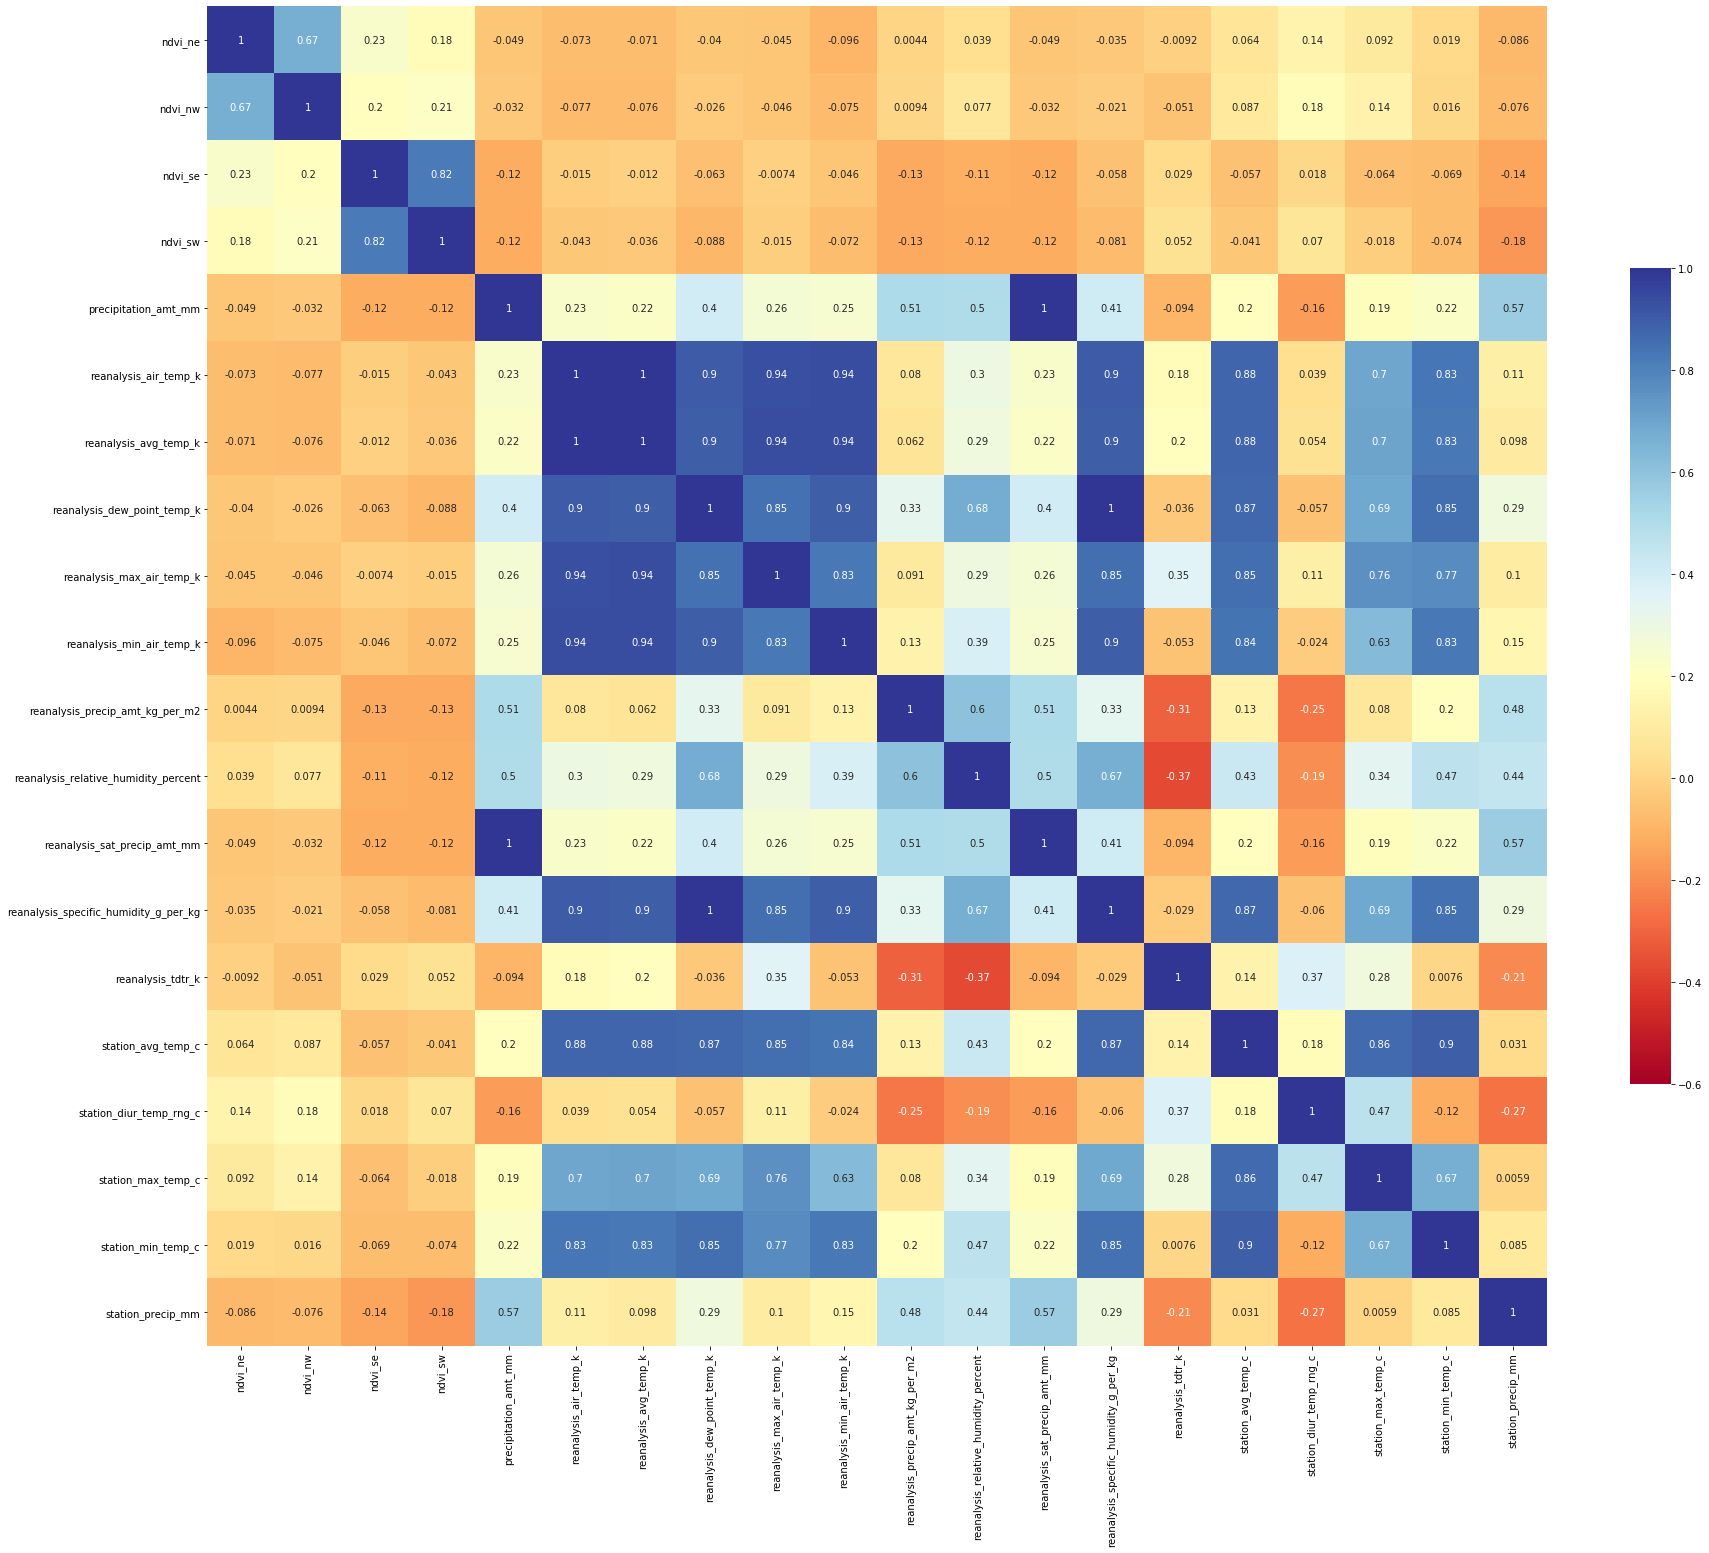

In [30]:
corr = sj_train_features.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

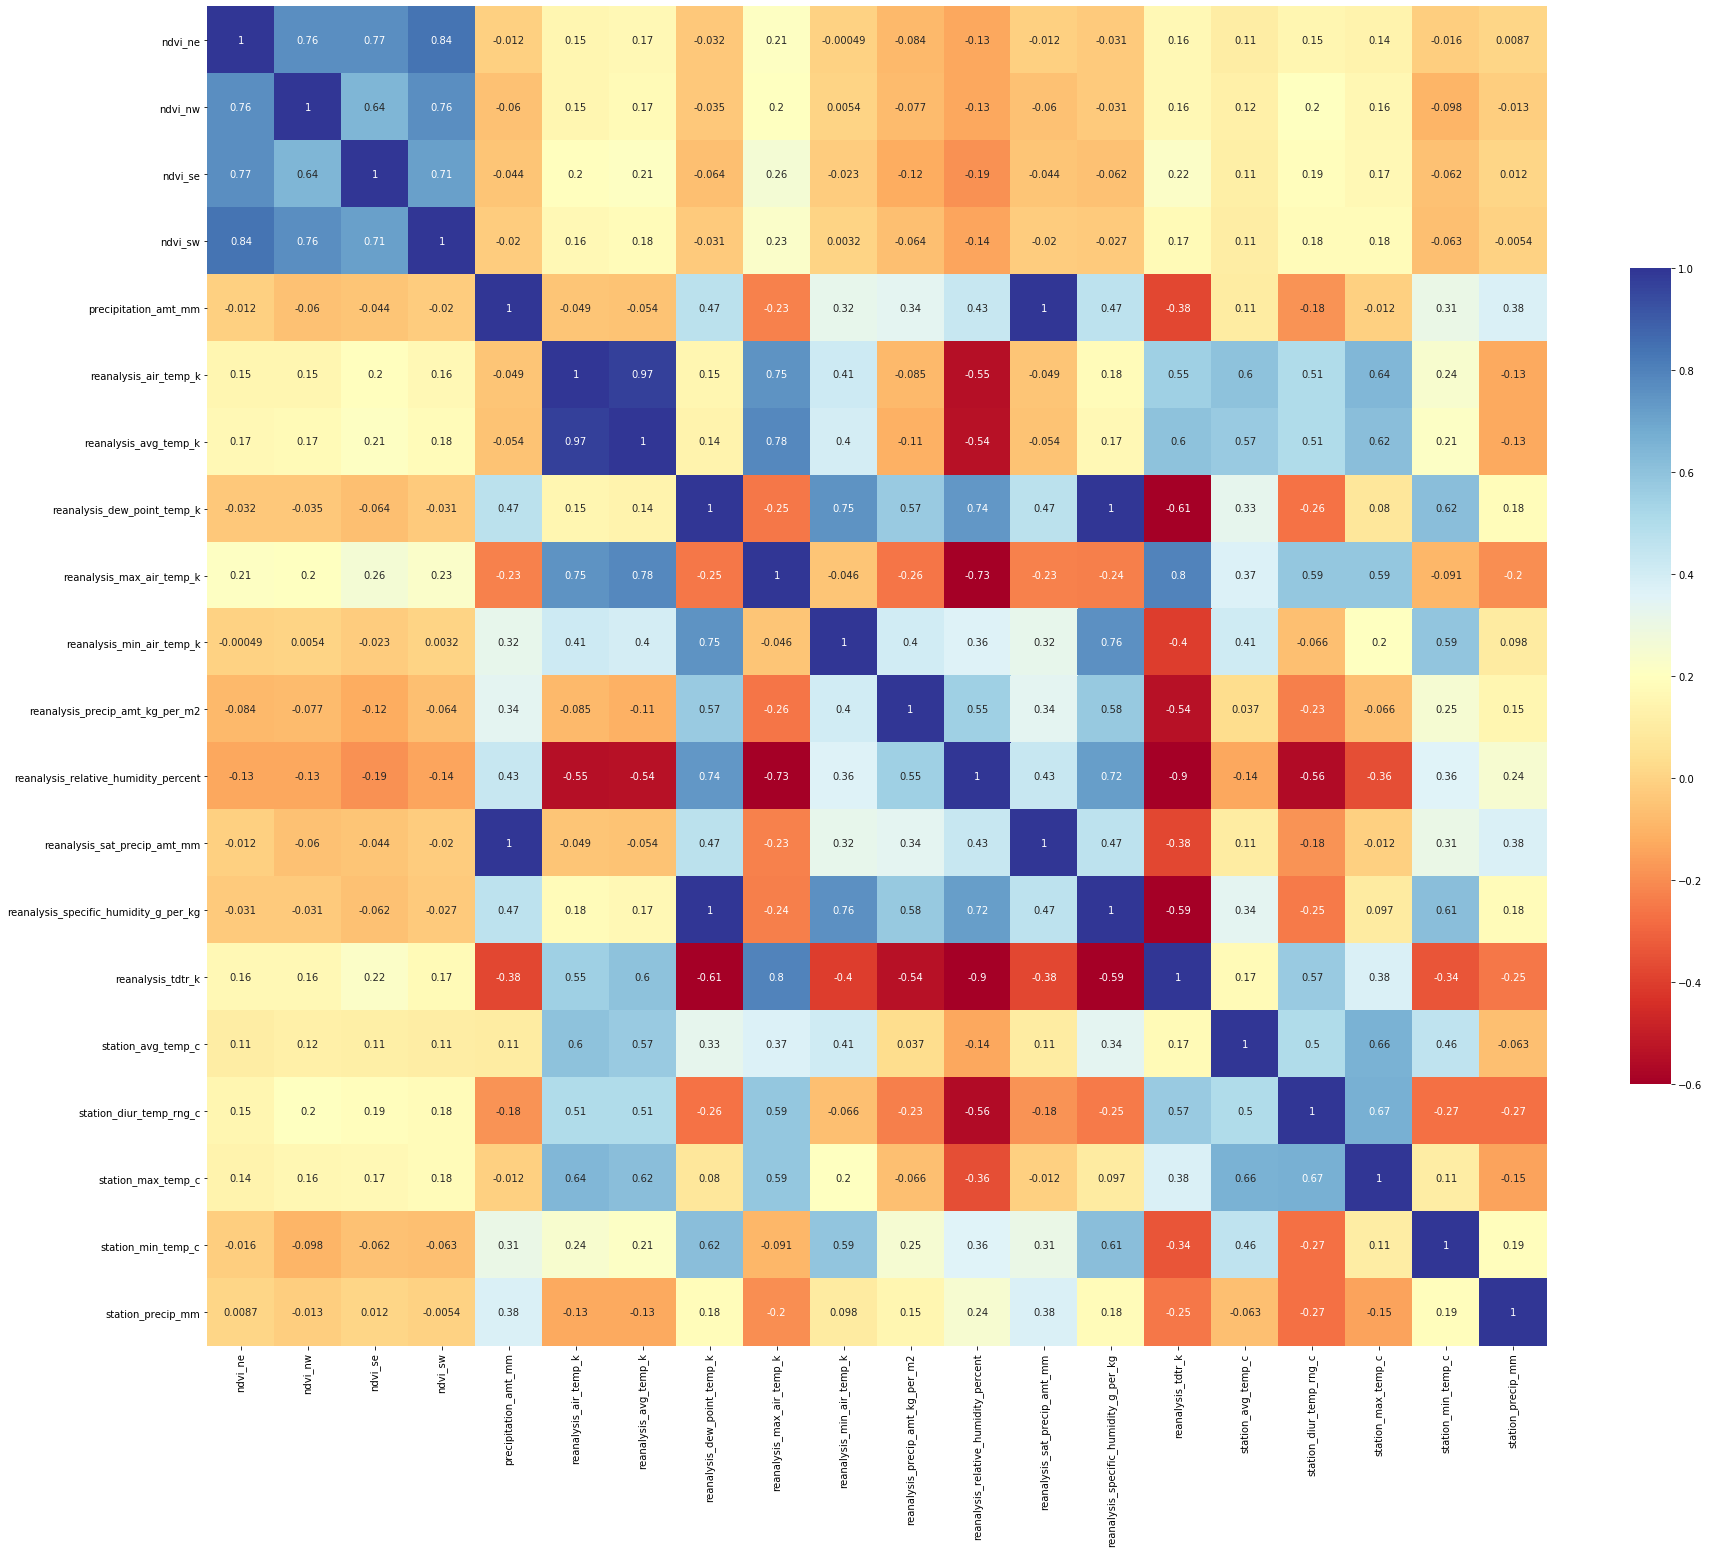

In [31]:
corr = iq_train_features.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

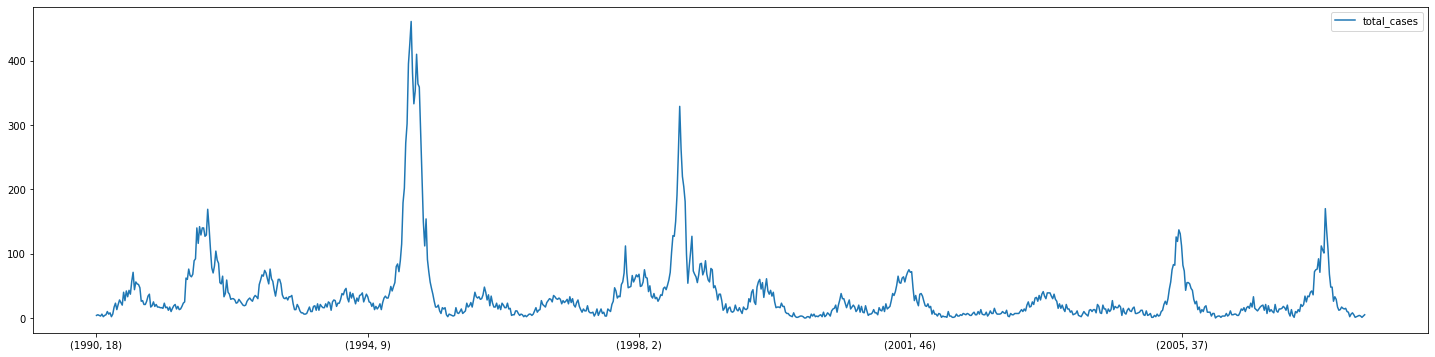

In [32]:
sj_train_labels.plot(figsize=(25,6));

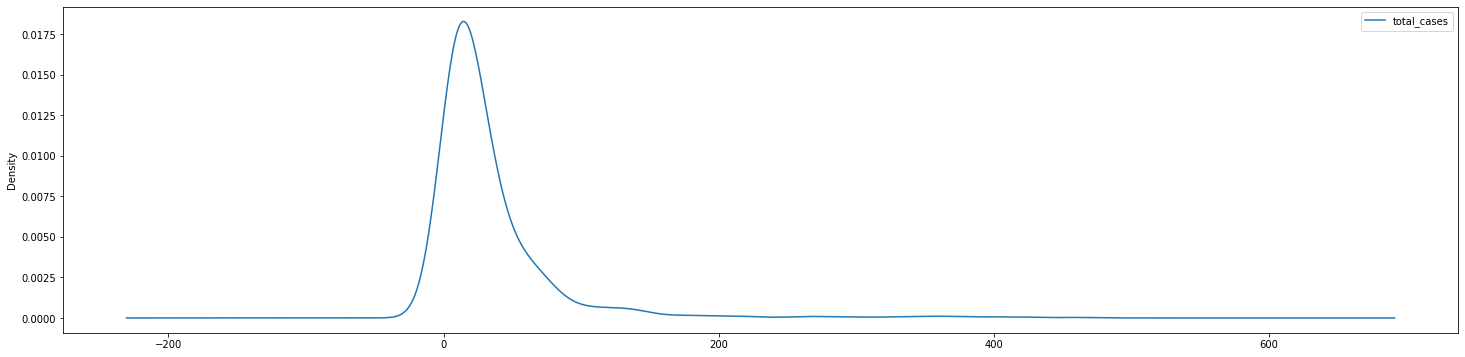

In [33]:
sj_train_labels.plot.density(figsize=(25,6));

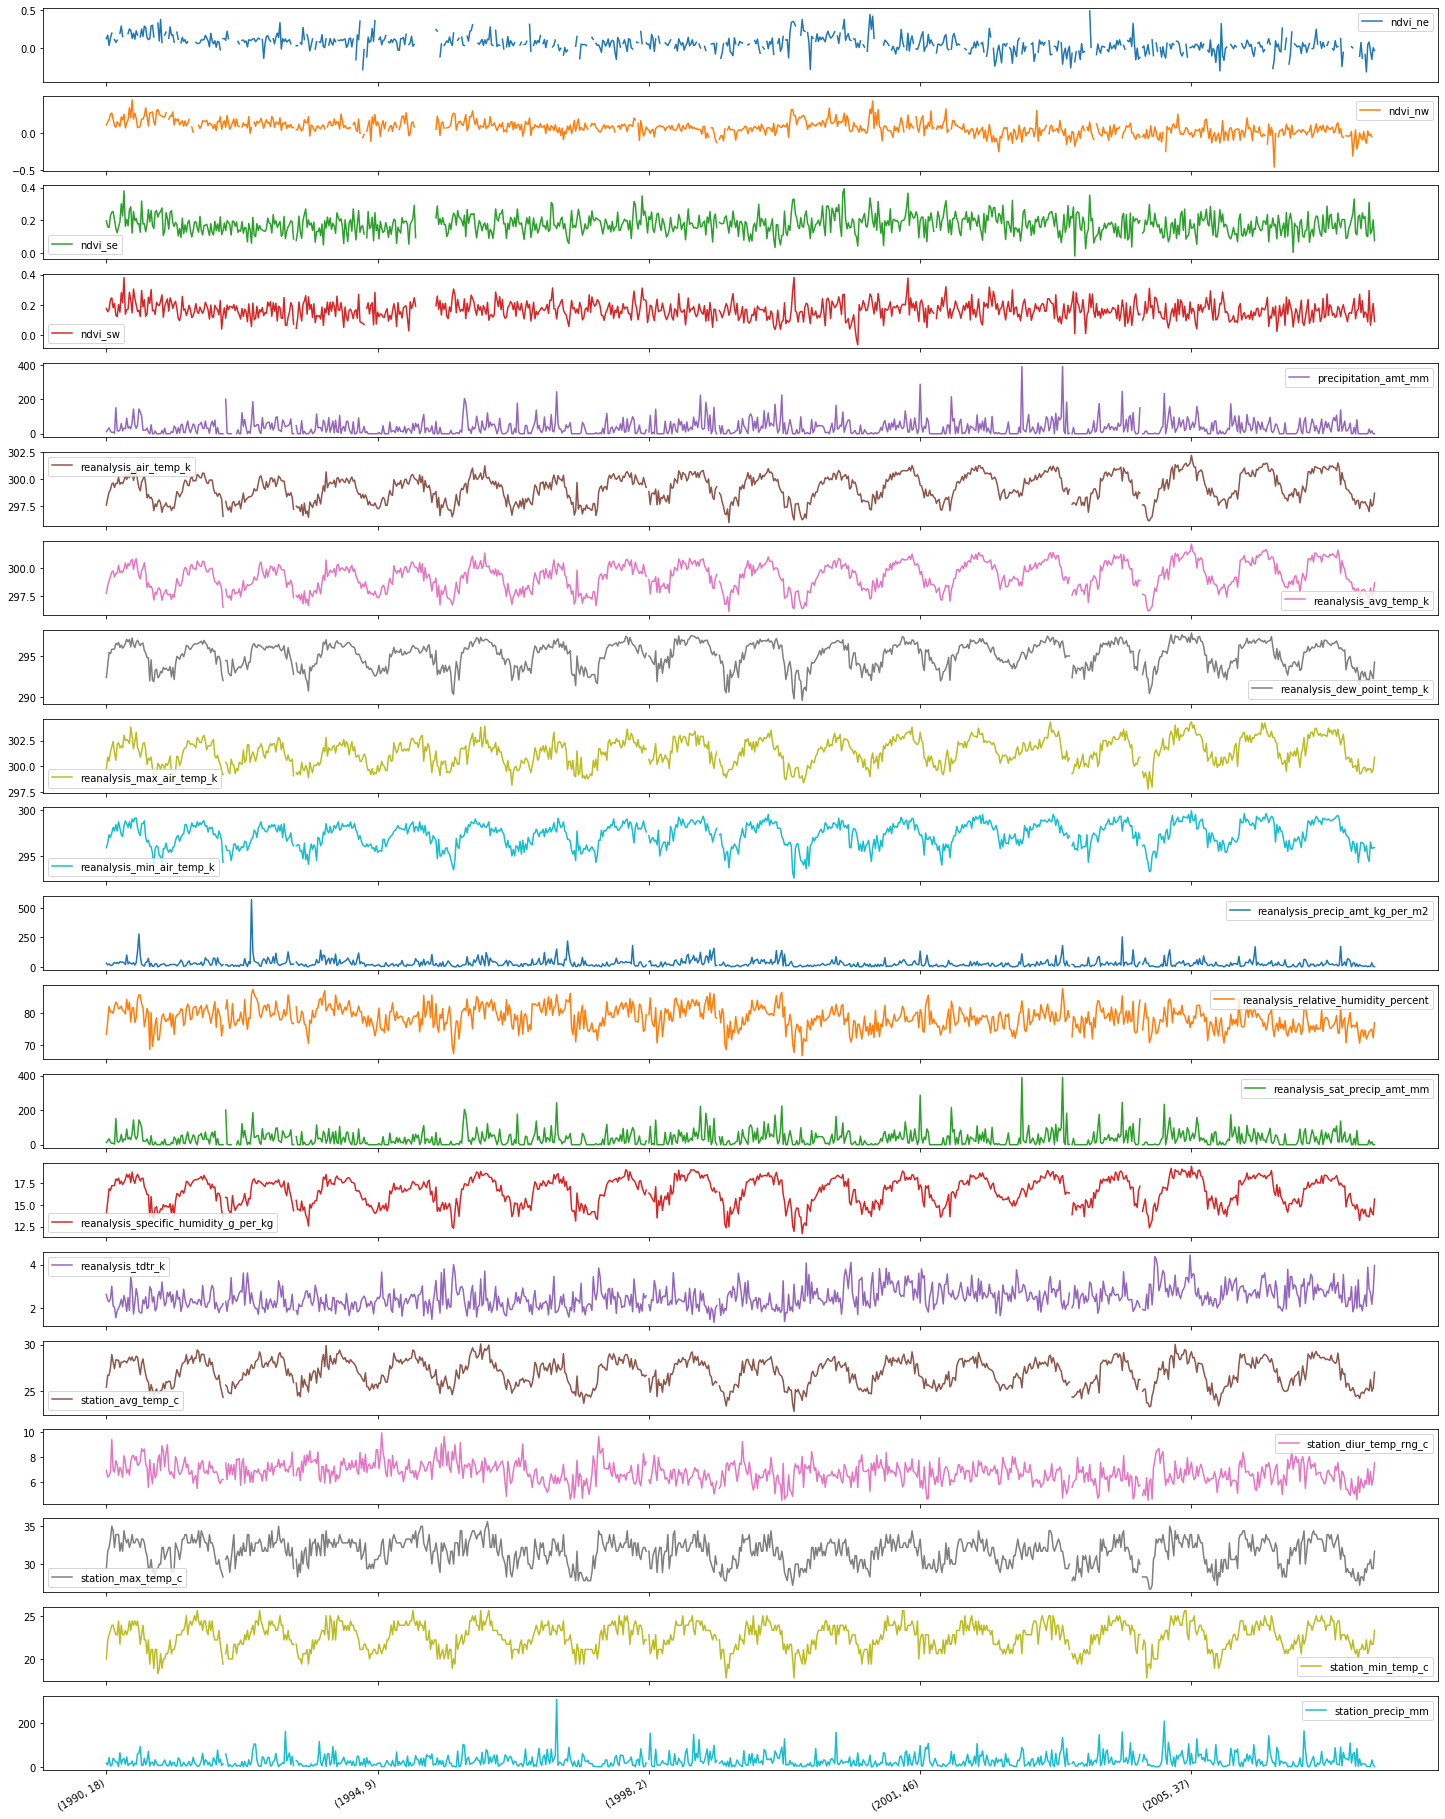

In [34]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

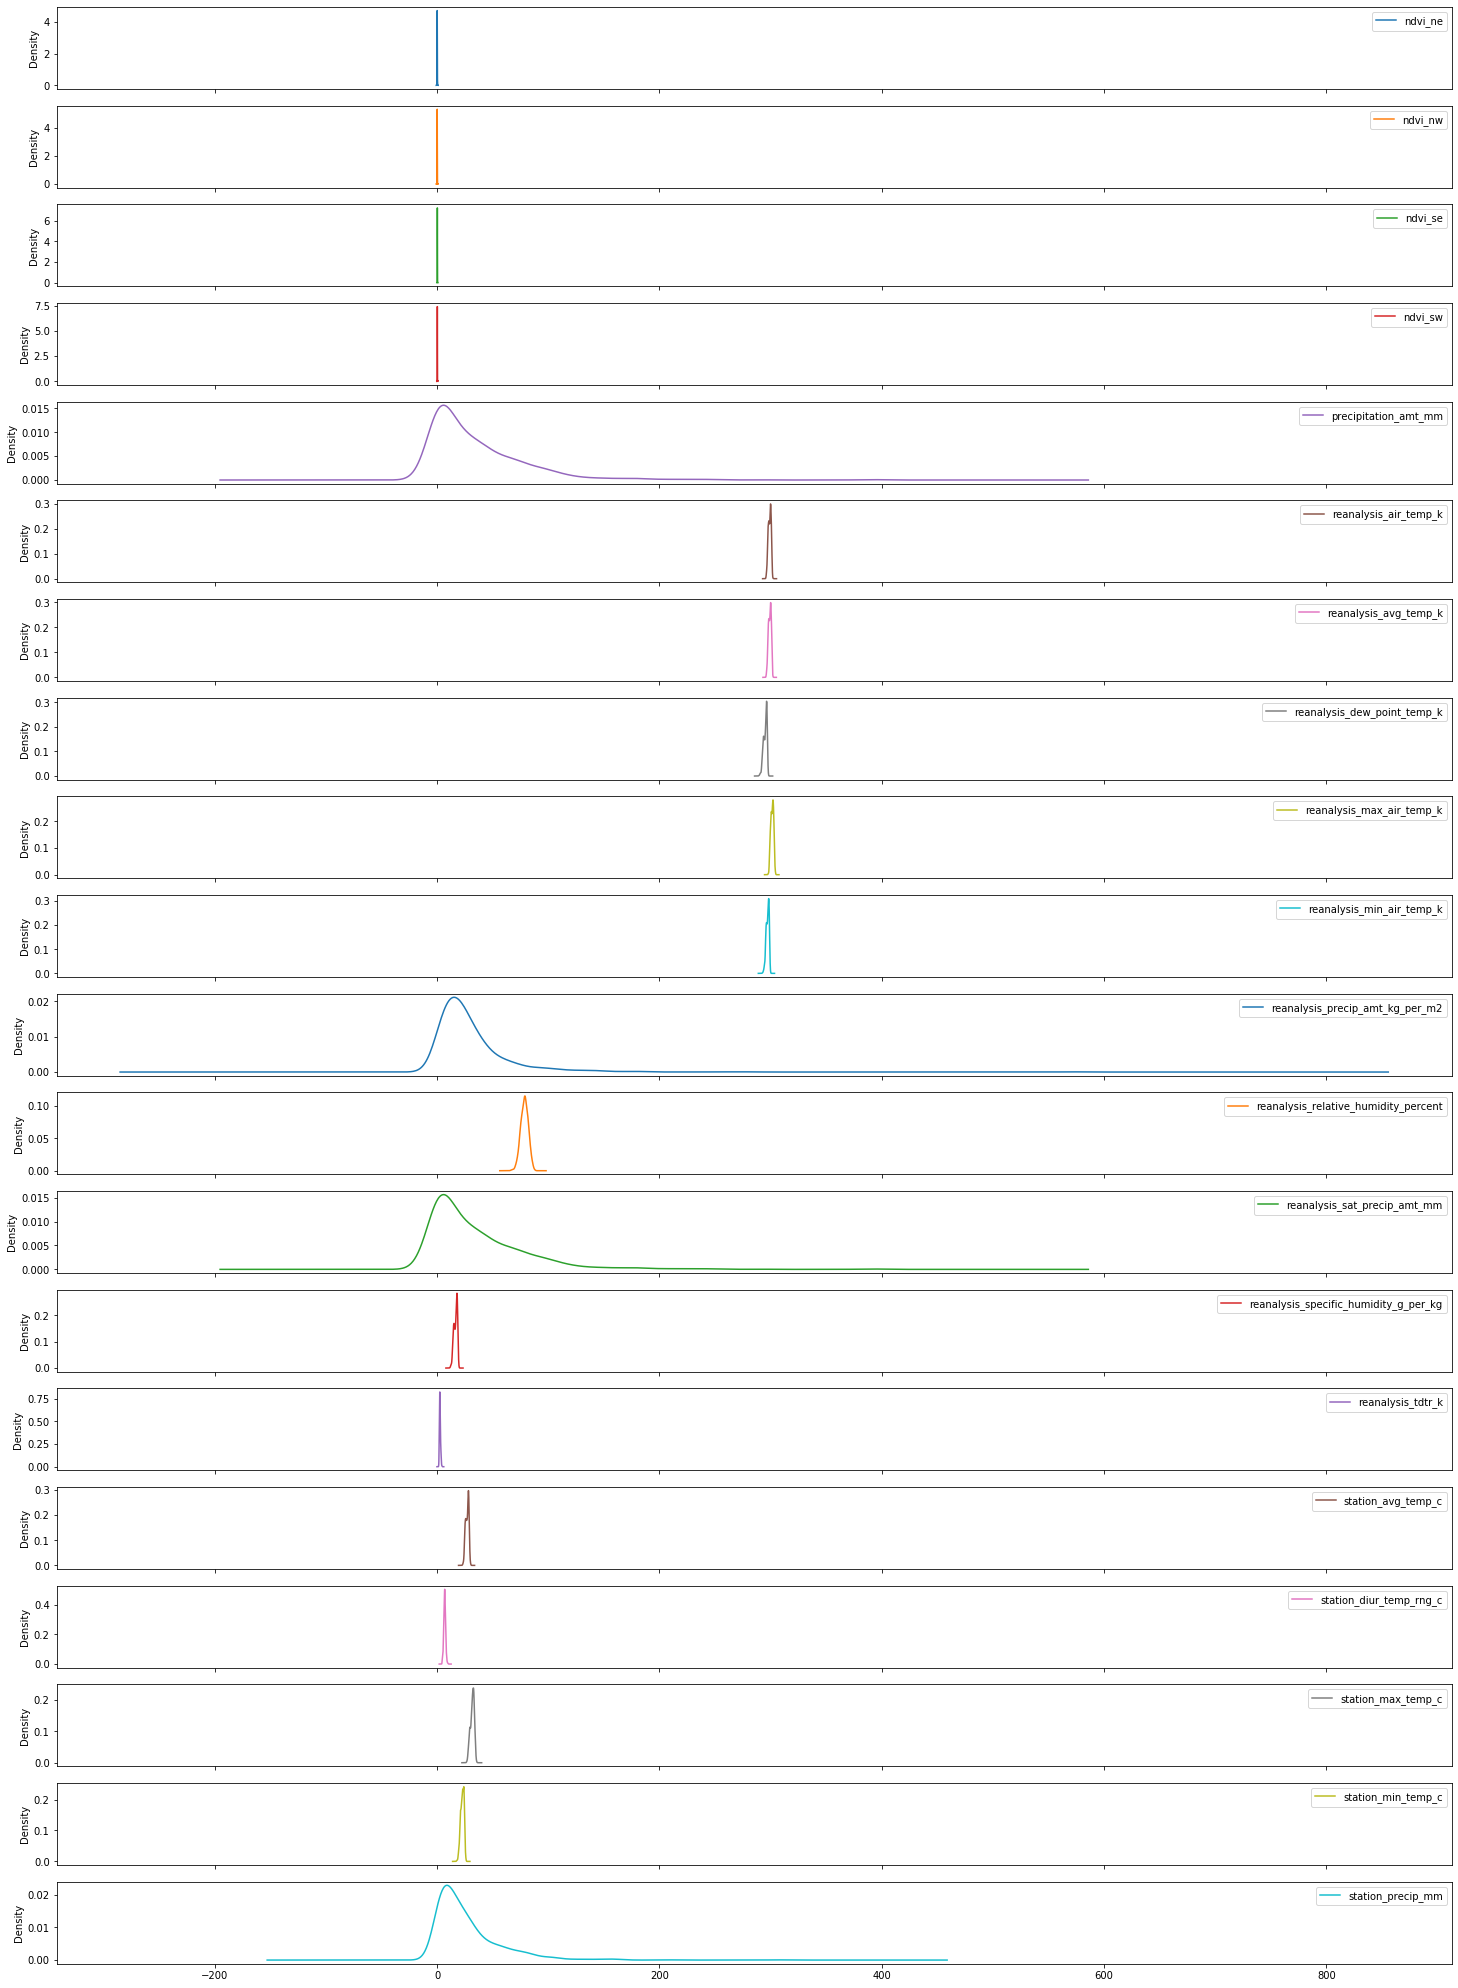

In [35]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot.density(figsize=(25,36),subplots=True);

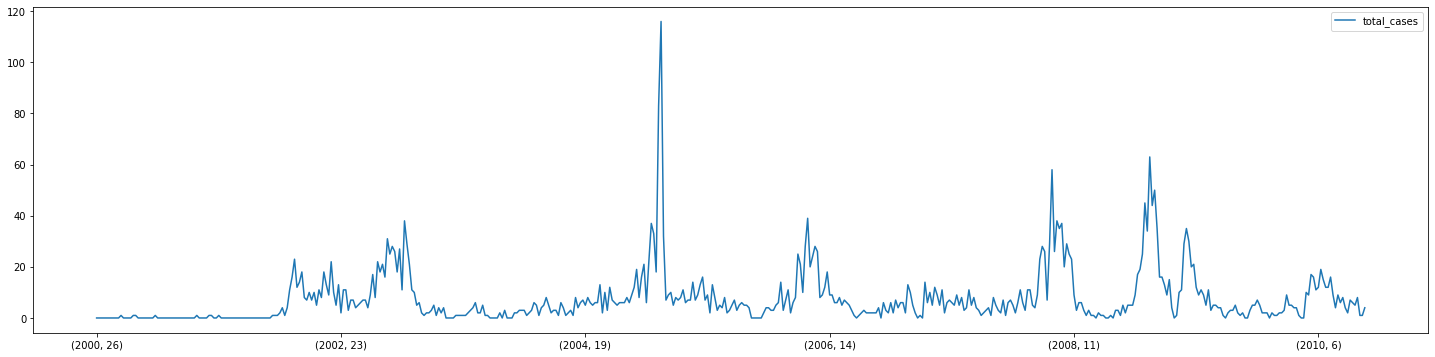

In [36]:
iq_train_labels.plot(figsize=(25,6));

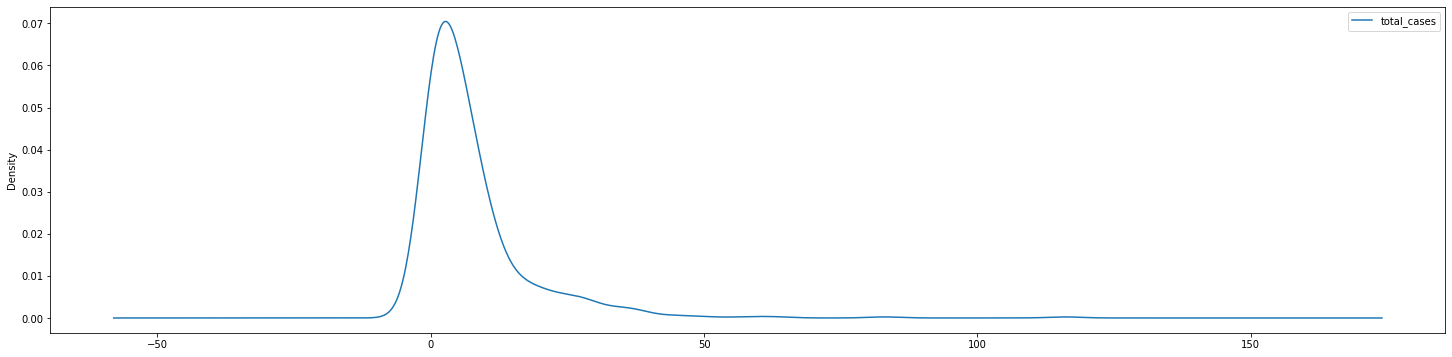

In [37]:
iq_train_labels.plot.density(figsize=(25,6));

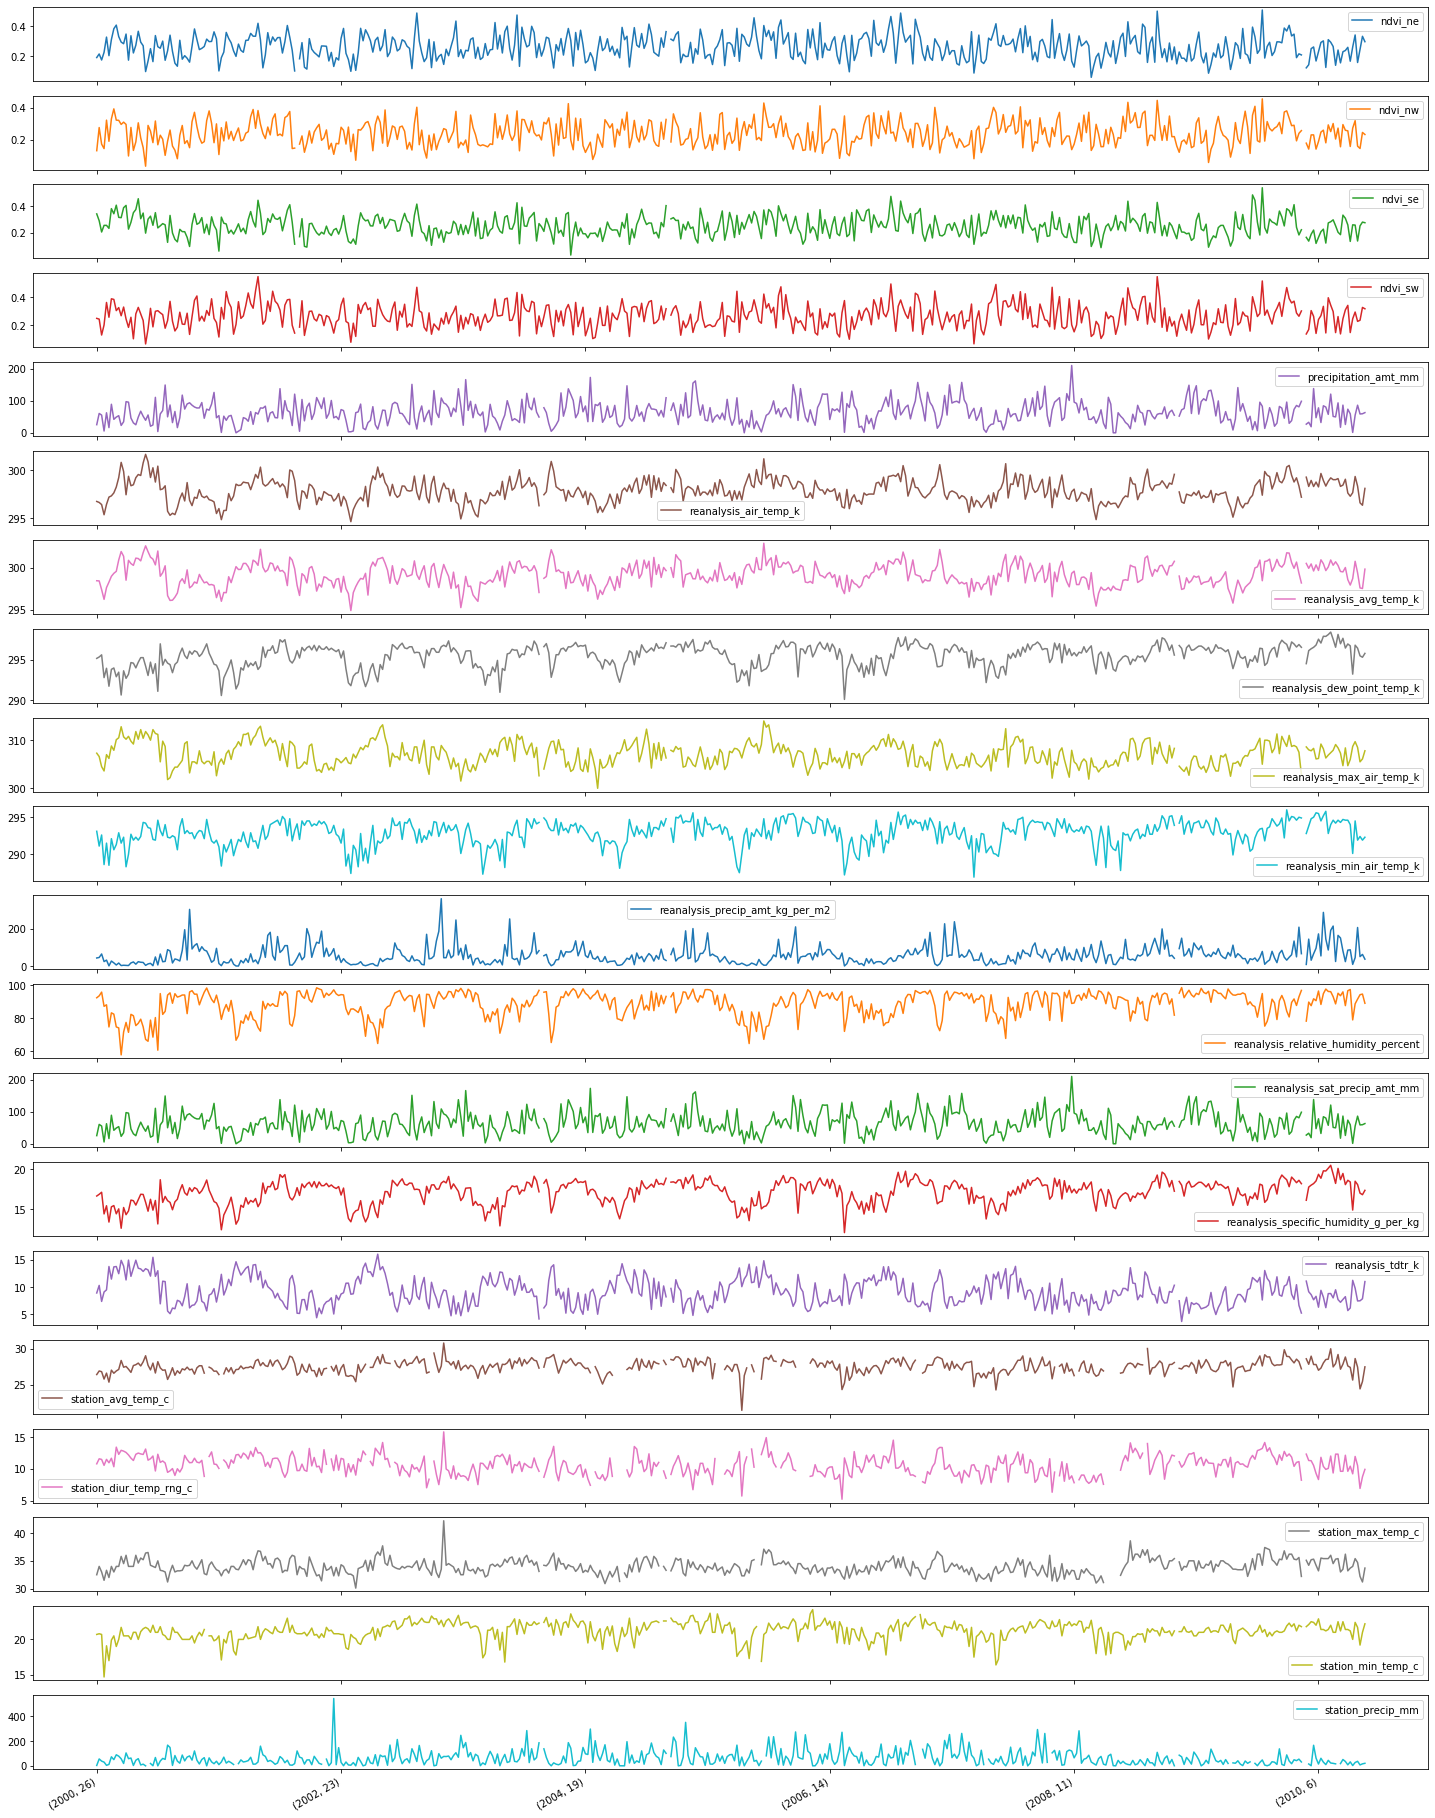

In [38]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

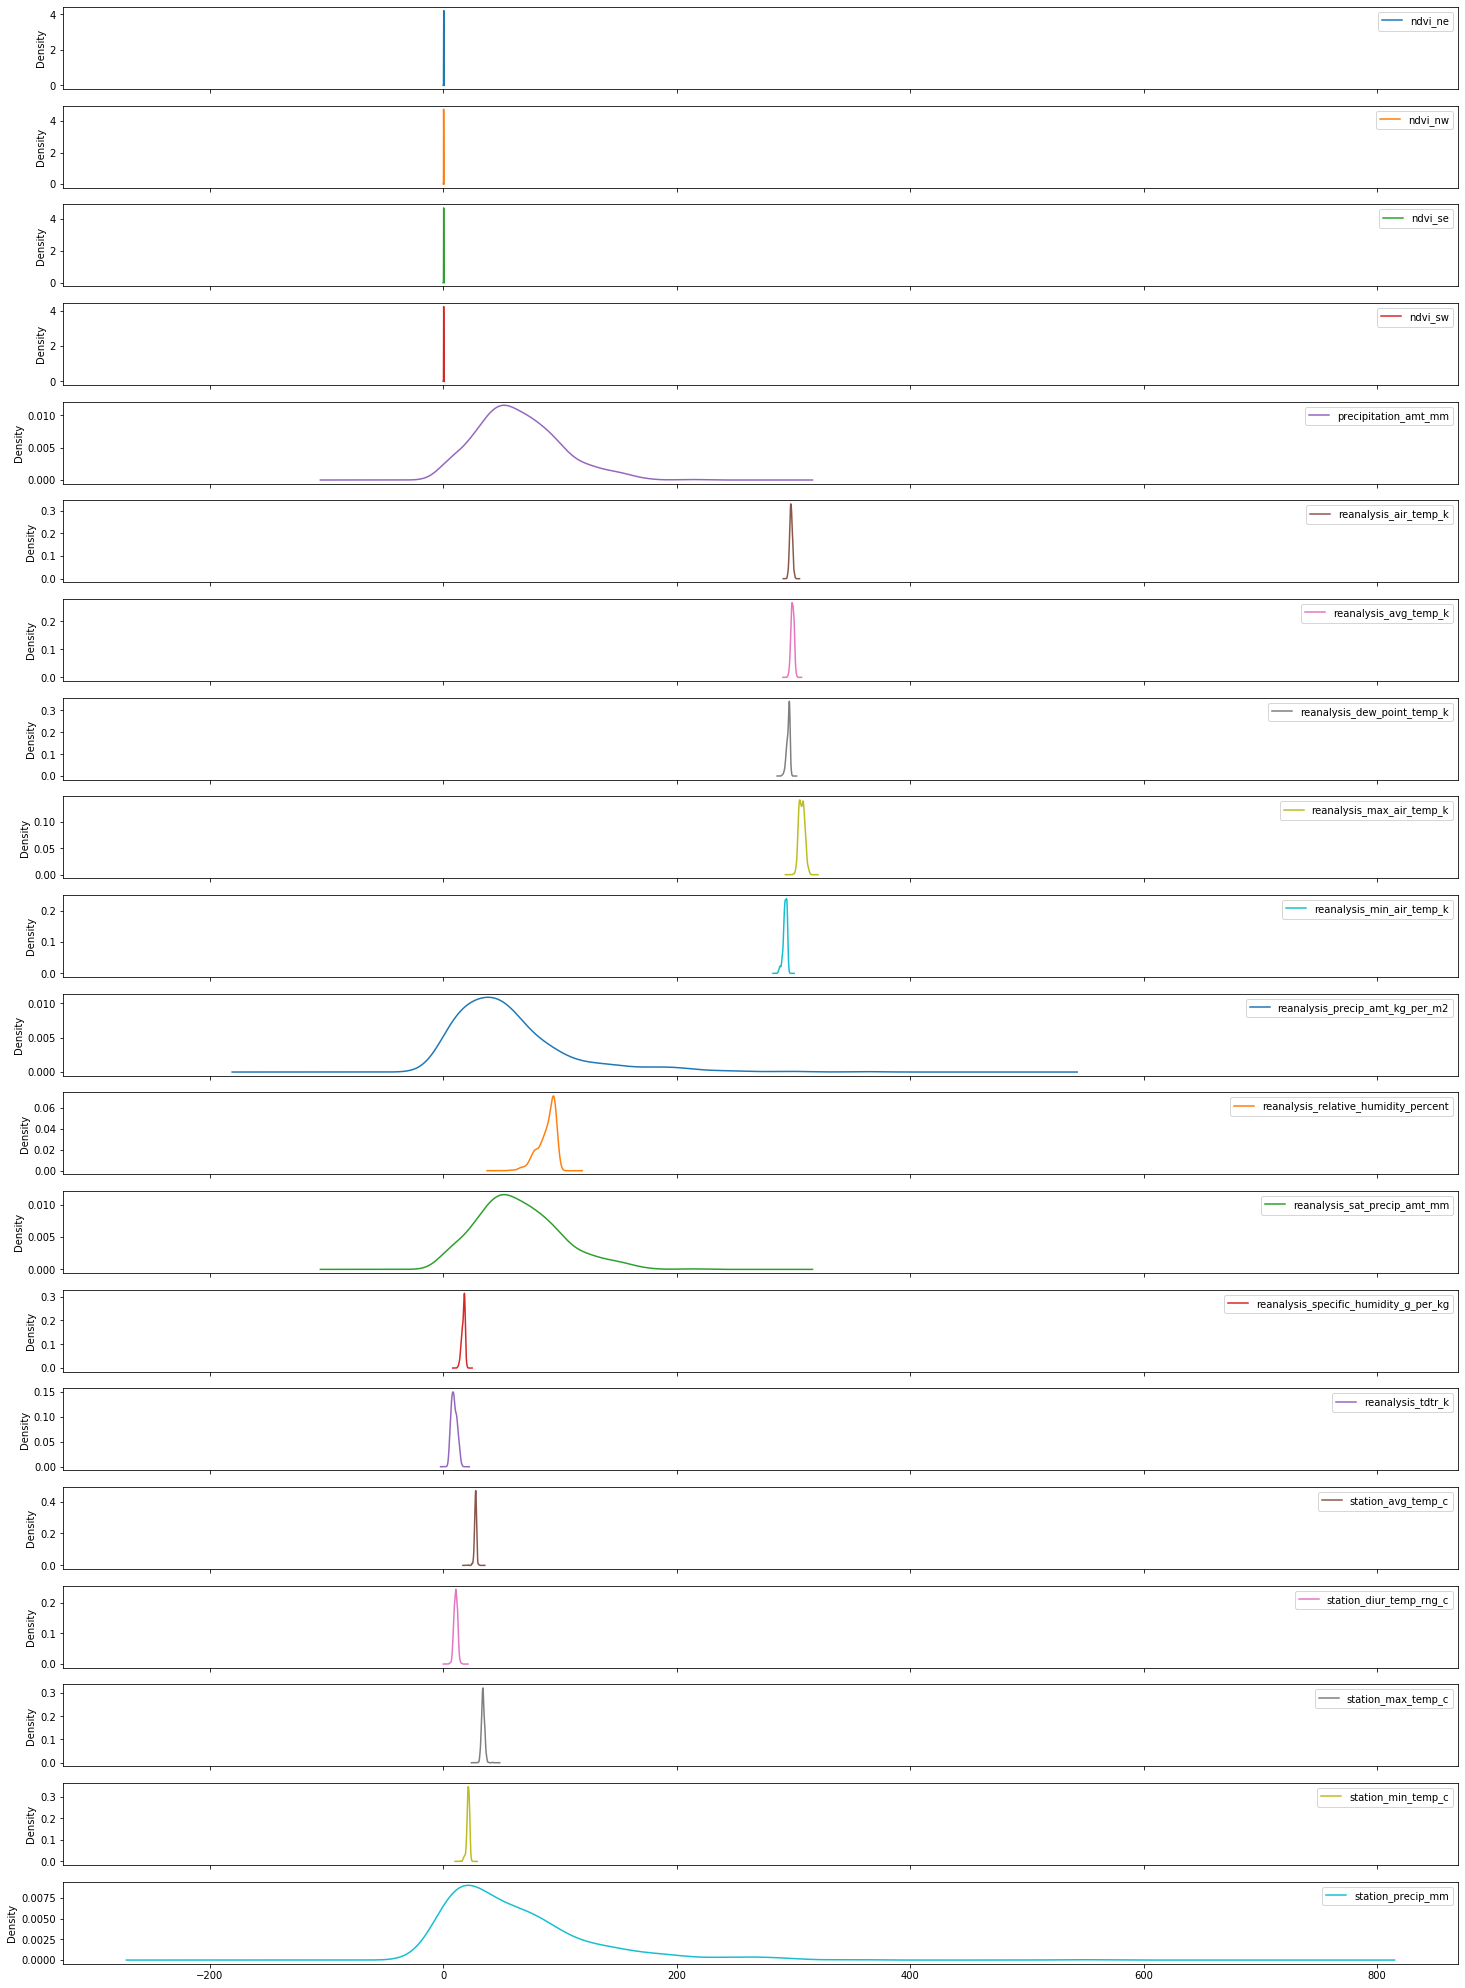

In [39]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot.density(figsize=(25,36),subplots=True);

In [40]:
sj_train_features.isna().sum()

week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

In [41]:
sj_train_features.fillna(method='ffill', inplace=True)
sj_train_features.isna().sum()

C:\Users\bryan\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

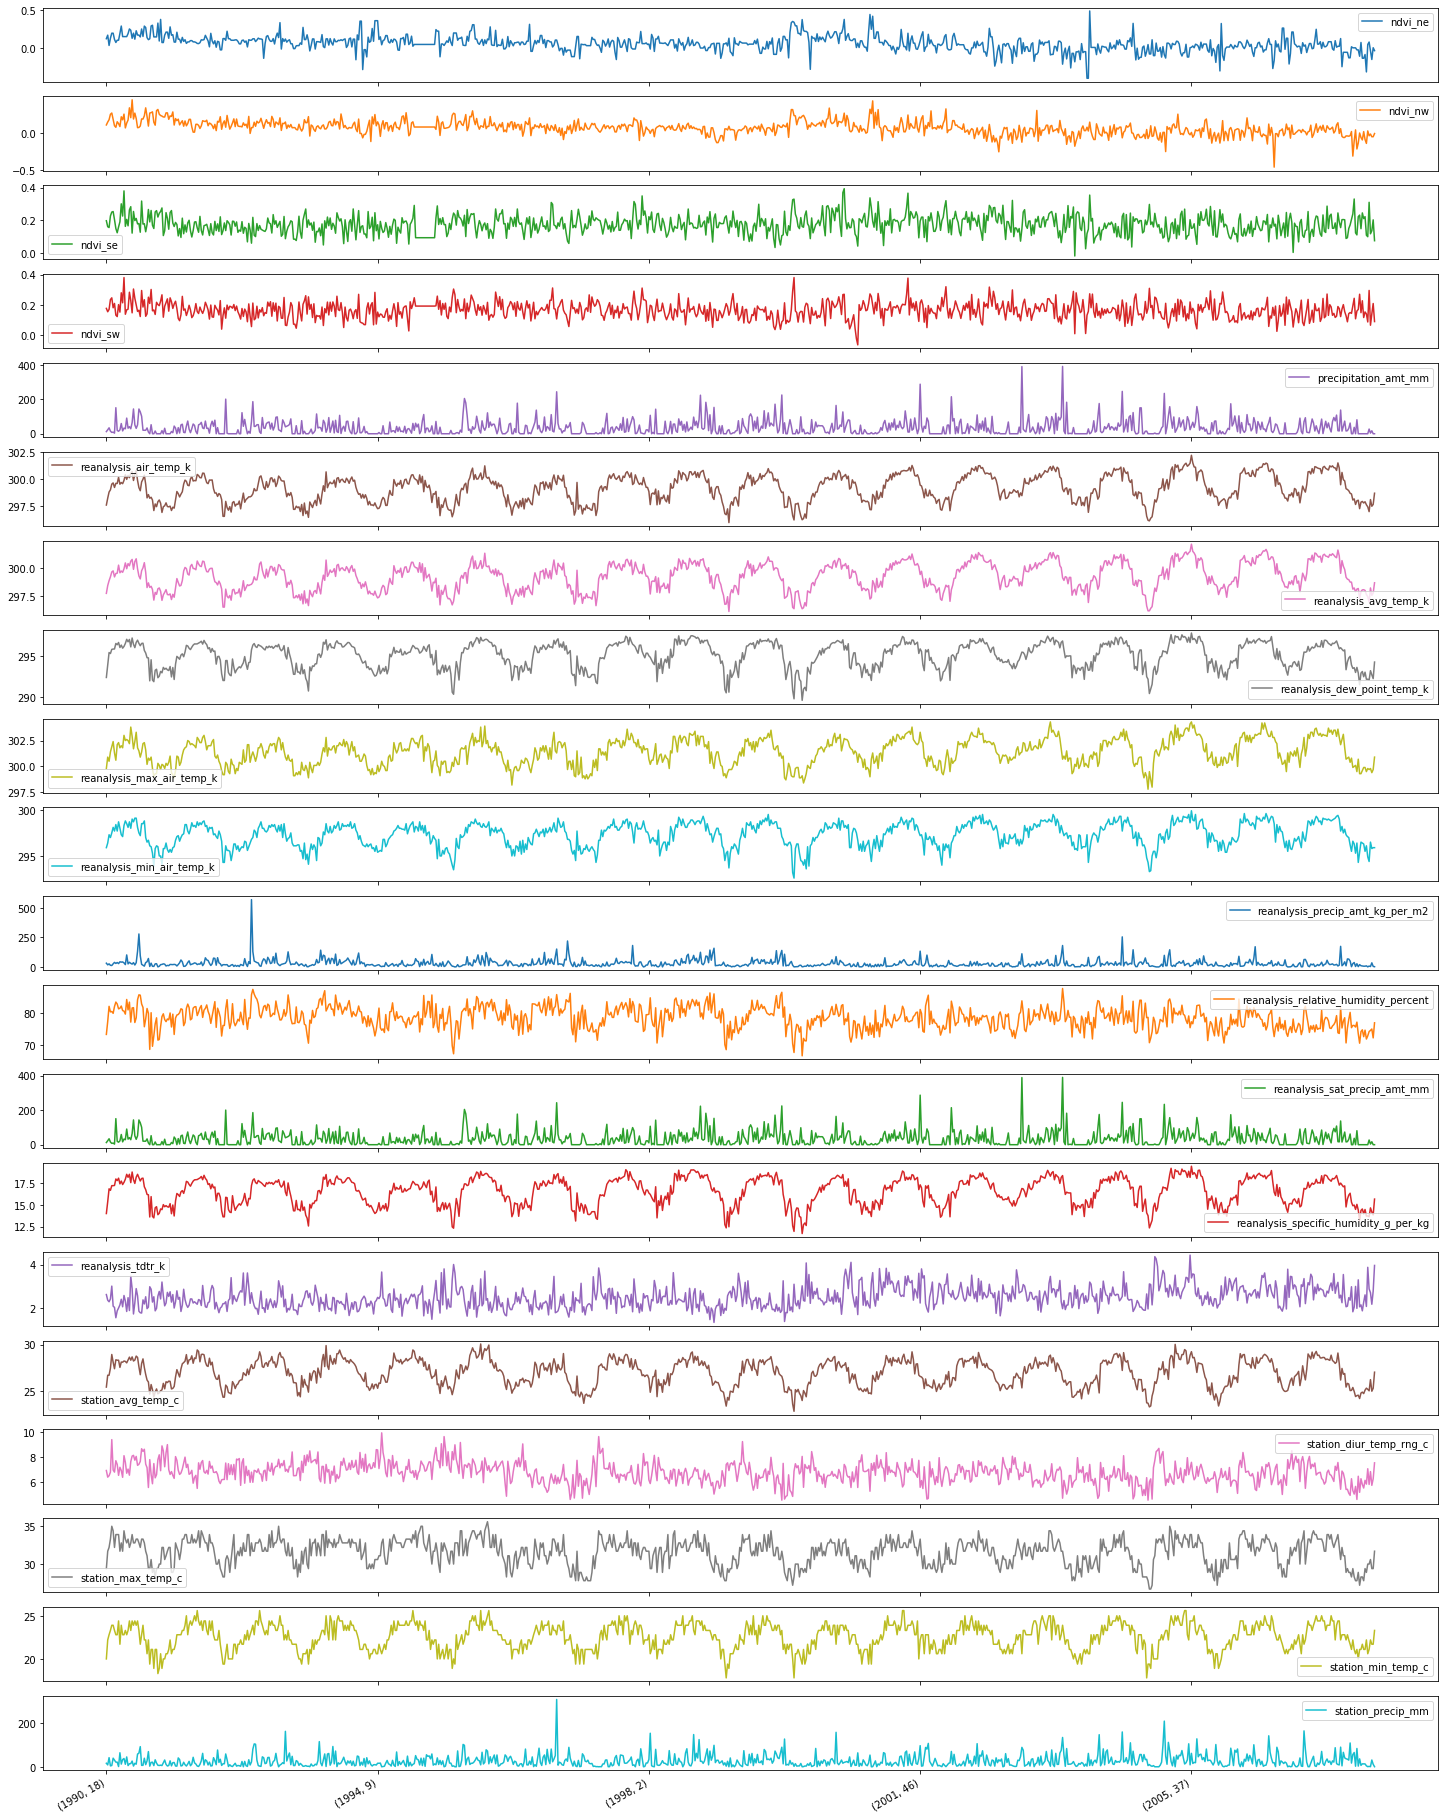

In [42]:
sj_train_features.loc[:,sj_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

In [43]:
sj_train_labels.isna().sum()

total_cases    0
dtype: int64

In [44]:
iq_train_features.isna().sum()

week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
dtype: int64

In [45]:
iq_train_features.fillna(method='ffill', inplace=True)
iq_train_features.isna().sum()

C:\Users\bryan\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

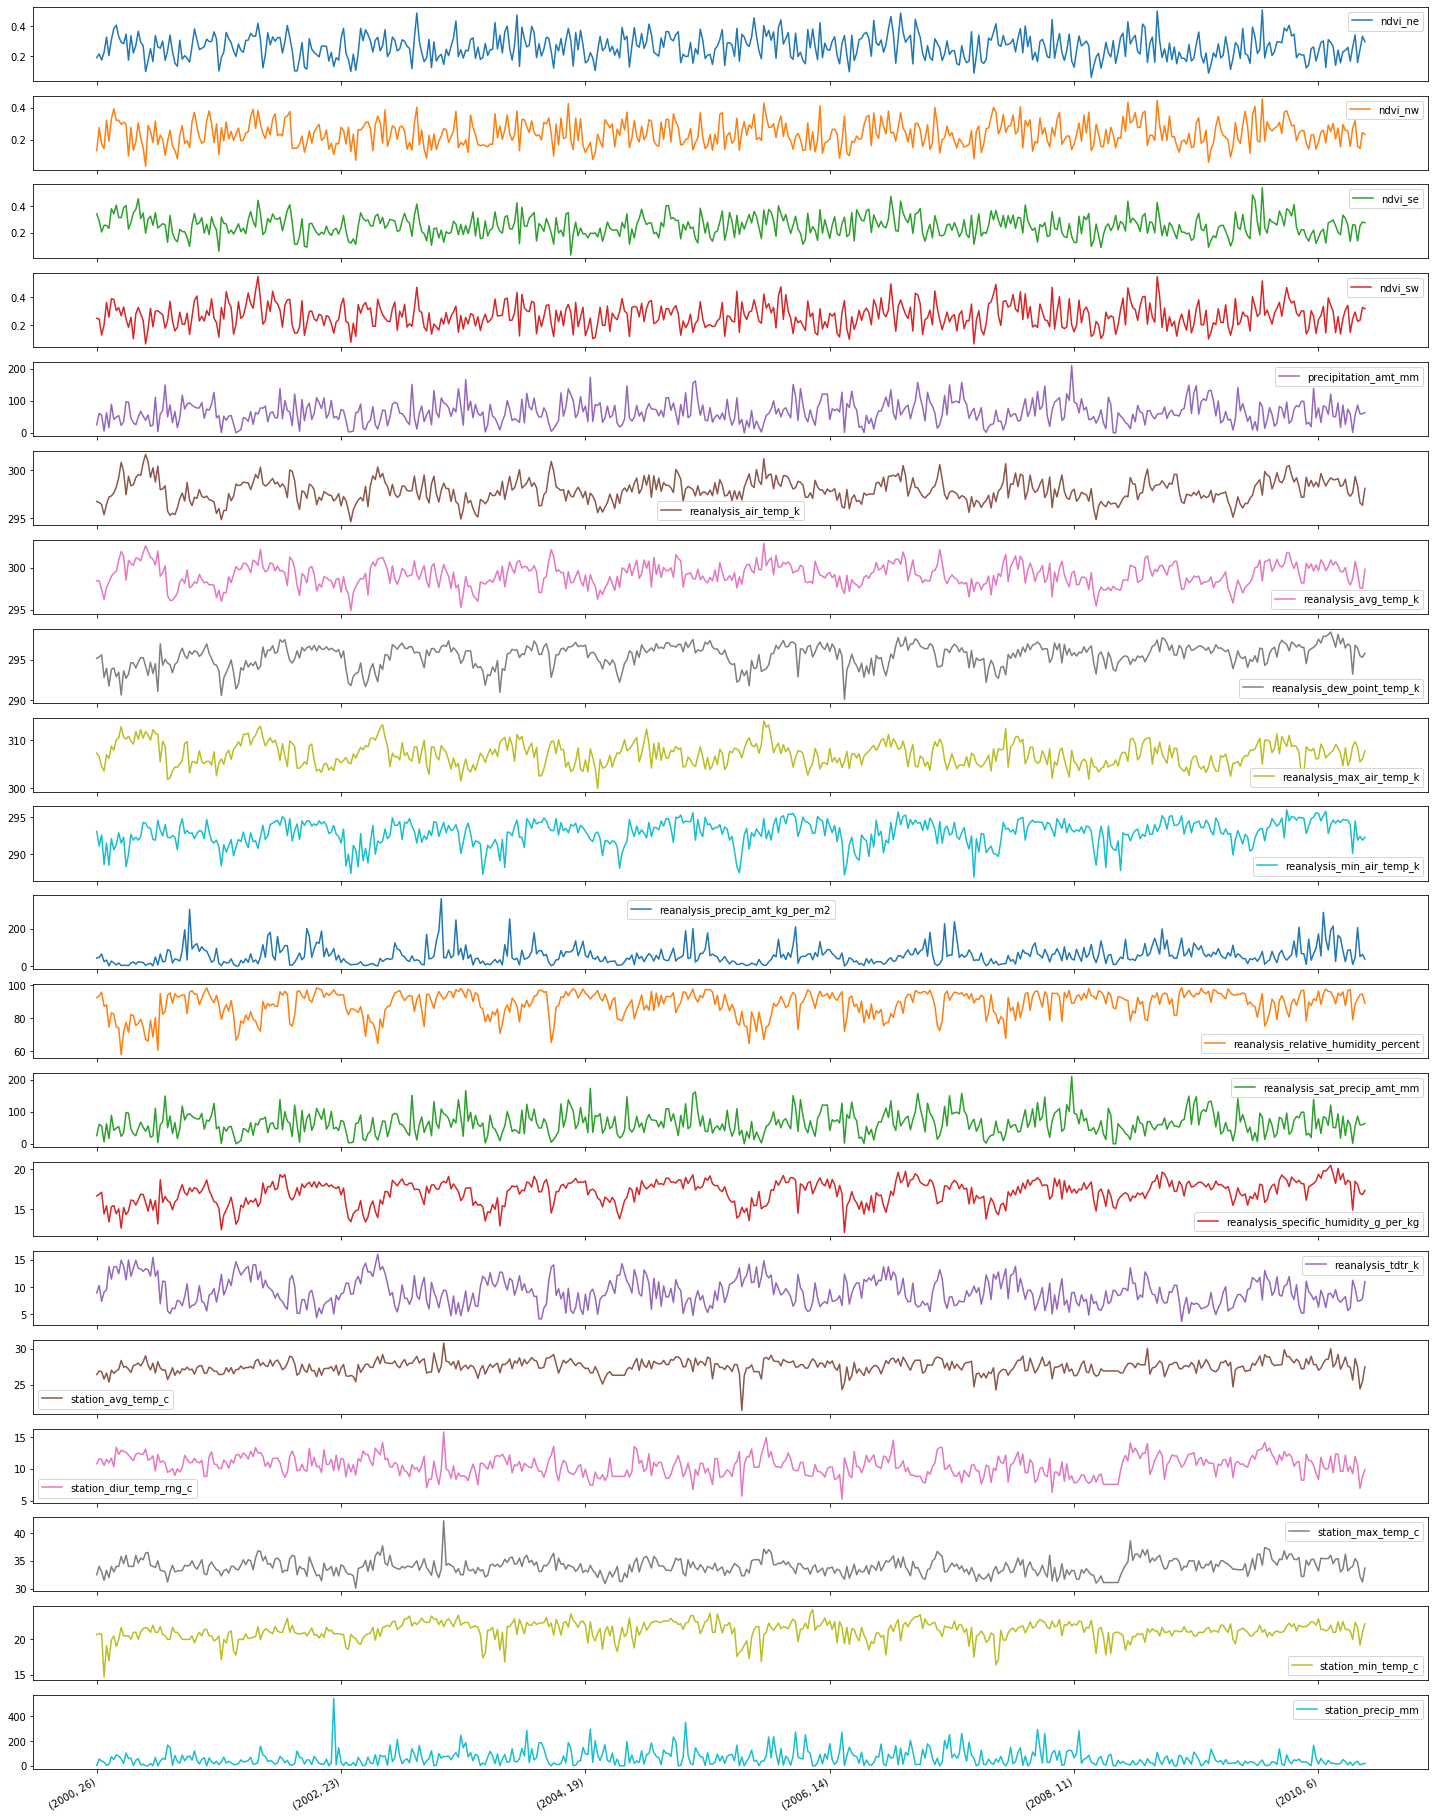

In [46]:
iq_train_features.loc[:,iq_train_features.columns != 'week_start_date'].plot(figsize=(25,36),subplots=True);

In [47]:
iq_train_labels.isna().sum()

total_cases    0
dtype: int64

In [48]:
iq_train_features.columns.nunique()

21

# split training set and then standardize all data on using the mean and std

In [49]:
def standardize(x, mean, std):
  return (x - mean) / std

def inv_standardize(x, mean, std):
  return (x * std) + mean

# TensorFlow section 
### LSTM model
#### add some Convolution layers maybe

In [50]:
import gc

gc.collect()

43895

In [51]:
# !pip install --upgrade tensorflow

In [52]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf

In [53]:
from sklearn.metrics import mean_absolute_error as mae

In [54]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

In [55]:
tf.__version__

'2.1.0'

In [56]:
tf.random.set_seed(29)

In [57]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

# San Juan predictions below

In [58]:
data = sj_train_labels['total_cases']
data.index = sj_train_features['week_start_date']
data.head()

week_start_date
1990-04-30    4
1990-05-07    5
1990-05-14    4
1990-05-21    3
1990-05-28    6
Name: total_cases, dtype: int64

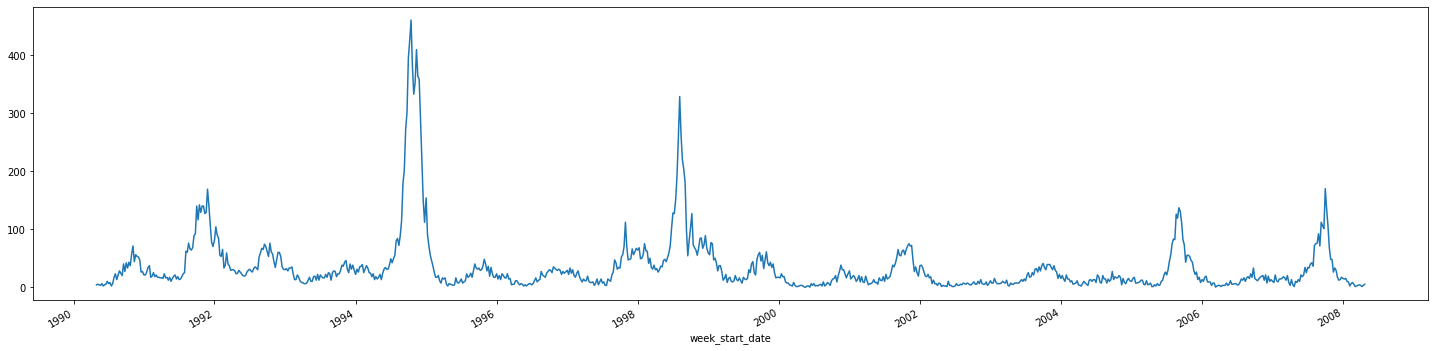

In [59]:
data.plot(figsize=(25,6),subplots=True);

In [60]:
TRAIN_SPLIT = len(data) - 260

In [61]:
desc = data[:TRAIN_SPLIT].describe()
desc

count    676.000000
mean      38.656805
std       57.422081
min        0.000000
25%       10.000000
50%       23.000000
75%       42.250000
max      461.000000
Name: total_cases, dtype: float64

In [62]:
data = data.values

In [63]:
train_mean = np.array(desc.T['mean'])
train_std = np.array(desc.T['std'])

In [64]:
data = standardize(data,train_mean,train_std)

In [65]:
past_history = 156
future_target = 0

x_train, y_train = univariate_data(data, 0, TRAIN_SPLIT, past_history, future_target)
x_val, y_val = univariate_data(data, TRAIN_SPLIT, None, past_history, future_target)

In [66]:
print ('Single window of past history')
print (x_train[0])
print ('\n Target to predict')
print (y_train[0])
print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("x_val shape:{}".format(x_val.shape))
print("y_val shape:{}".format(y_val.shape))

Single window of past history
[[-0.60354491]
 [-0.58613001]
 [-0.60354491]
 [-0.62095981]
 [-0.5687151 ]
 [-0.63837472]
 [-0.60354491]
 [-0.58613001]
 [-0.49905549]
 [-0.5687151 ]
 [-0.5338853 ]
 [-0.63837472]
 [-0.5687151 ]
 [-0.37715117]
 [-0.27266174]
 [-0.44681078]
 [-0.30749155]
 [-0.18558723]
 [-0.25524684]
 [-0.32490645]
 [ 0.02339162]
 [-0.20300213]
 [ 0.05822142]
 [-0.09851271]
 [ 0.07563633]
 [-0.02885309]
 [ 0.31944498]
 [ 0.56325363]
 [ 0.09305123]
 [ 0.30203007]
 [ 0.24978536]
 [ 0.23237046]
 [ 0.14529594]
 [-0.22041703]
 [-0.20300213]
 [-0.30749155]
 [-0.30749155]
 [-0.22041703]
 [-0.08109781]
 [-0.02885309]
 [-0.37715117]
 [-0.34232136]
 [-0.23783194]
 [-0.35973626]
 [-0.30749155]
 [-0.37715117]
 [-0.37715117]
 [-0.39456607]
 [-0.39456607]
 [-0.41198097]
 [-0.27266174]
 [-0.39456607]
 [-0.37715117]
 [-0.46422568]
 [-0.37715117]
 [-0.49905549]
 [-0.41198097]
 [-0.34232136]
 [-0.30749155]
 [-0.42939588]
 [-0.35973626]
 [-0.44681078]
 [-0.42939588]
 [-0.35973626]
 [-0.27266

In [67]:
def create_time_steps(length):
  return list(range(-length, 0))

In [68]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0
  plt.figure(figsize=(20,6))
  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

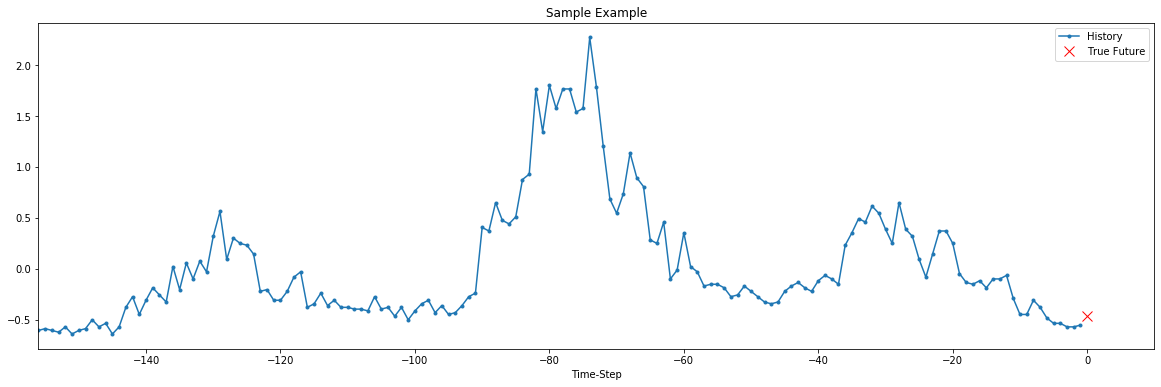

In [69]:
show_plot([x_train[0], y_train[0]], 0, 'Sample Example');

In [70]:
def baseline(history):
  return np.mean(history)

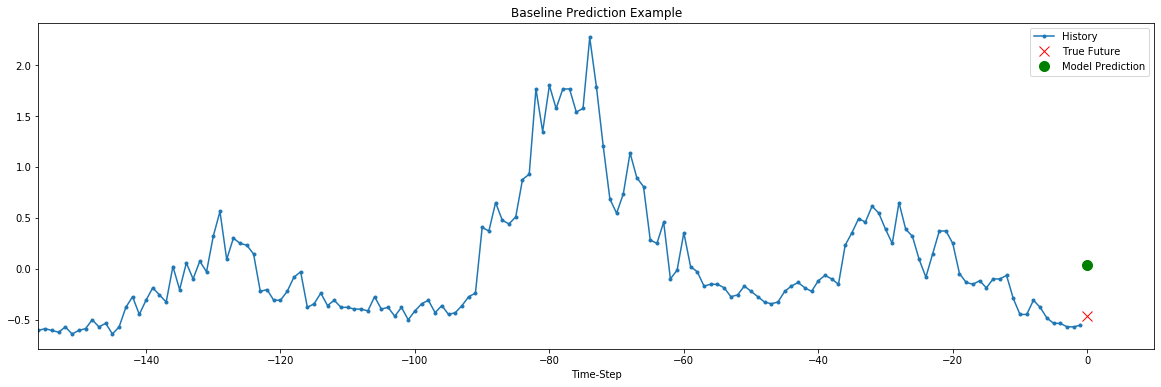

In [71]:
show_plot([x_train[0], y_train[0], baseline(x_train[0])], 0,
           'Baseline Prediction Example');

In [72]:
BATCH_SIZE = 10000
# BUFFER_SIZE = .shuffle(BUFFER_SIZE)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [73]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=x_train.shape[-2:], activation='elu'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [74]:
for x, y in val_data.take(1):
    print(simple_lstm_model.predict(x).shape)

(104, 1)


In [75]:
EVALUATION_INTERVAL = TRAIN_SPLIT
EPOCHS = 5

single_step_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_data, validation_steps=260)

Train for 676 steps, validate for 260 steps
Epoch 1/5
676/676 [==============================] - 147s 217ms/step - loss: 0.1722 - val_loss: 0.1374
Epoch 2/5
676/676 [==============================] - 143s 212ms/step - loss: 0.1036 - val_loss: 0.1584
Epoch 3/5
676/676 [==============================] - 143s 211ms/step - loss: 0.0906 - val_loss: 0.1801
Epoch 4/5
676/676 [==============================] - 148s 219ms/step - loss: 0.0802 - val_loss: 0.1758
Epoch 5/5
676/676 [==============================] - 144s 213ms/step - loss: 0.0726 - val_loss: 0.2180


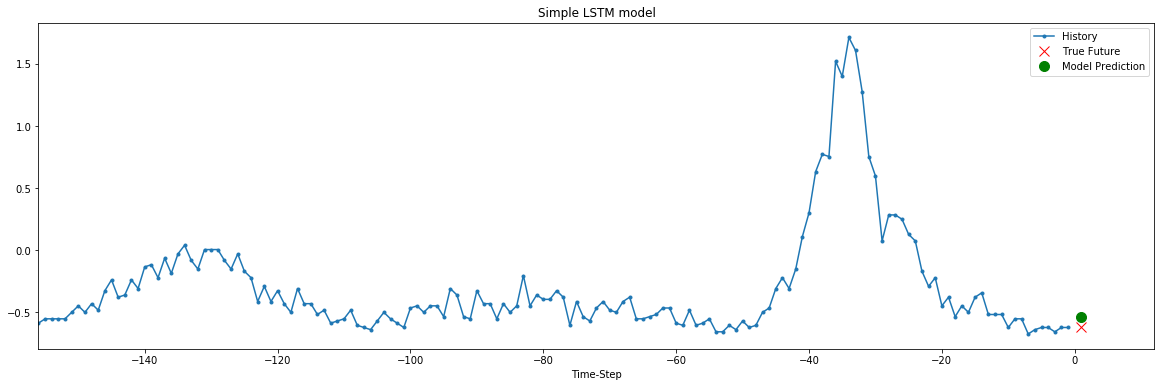

In [76]:
for x, y in val_data.take(1):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 1, 'Simple LSTM model')
  plot.show()

In [77]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure(figsize=(25,6))

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

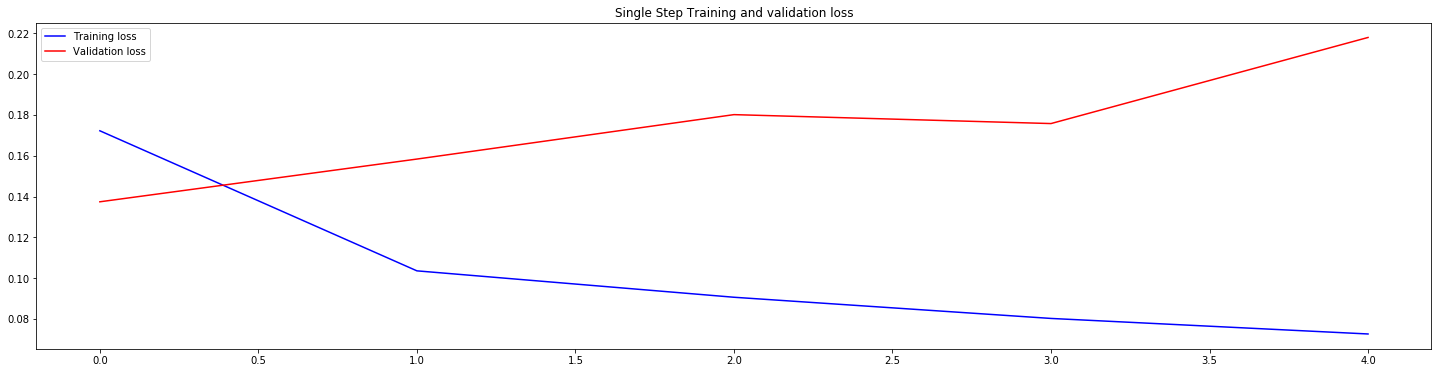

In [78]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [79]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [80]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
(1990, 18)      1990-04-30  0.122600  0.103725  0.198483  0.177617   
(1990, 19)      1990-05-07  0.169900  0.142175  0.162357  0.155486   
(1990, 20)      1990-05-14  0.032250  0.172967  0.157200  0.170843   
(1990, 21)      1990-05-21  0.128633  0.245067  0.227557  0.235886   
(1990, 22)      1990-05-28  0.196200  0.262200  0.251200  0.247340   

            precipitation_amt_mm  reanalysis_air_temp_k  \
(1990, 18)                 12.42             297.572857   
(1990, 19)                 22.82             298.211429   
(1990, 20)                 34.54             298.781429   
(1990, 21)                 15.36             298.987143   
(1990, 22)                  7.52             299.518571   

            reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
(1990, 18)             297.742857                   292.414286   
(1990, 19)             298.442857                   293.951429   
(1990, 20)             298.878571                   295.434286   
(1990, 21)             299.228571                   295.310000   
(1990, 22)             299.664286                   295.821429   

            reanalysis_max_air_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
(1990, 18)                      299.8  ...                            32.00   
(1990, 19)                      300.9  ...                            17.94   
(1990, 20)                      300.5  ...                            26.10   
(1990, 21)                      301.4  ...                            13.90   
(1990, 22)                      301.9  ...                            12.20   

            reanalysis_relative_humidity_percent  \
(1990, 18)                             73.365714   
(1990, 19)                             77.368571   
(1990, 20)                             82.052857   
(1990, 21)                             80.337143   
(1990, 22)                             80.460000   

            reanalysis_sat_precip_amt_mm  \
(1990, 18)                         12.42   
(1990, 19)                         22.82   
(1990, 20)                         34.54   
(1990, 21)                         15.36   
(1990, 22)                          7.52   

            reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
(1990, 18)                              14.012857           2.628571   
(1990, 19)                              15.372857           2.371429   
(1990, 20)                              16.848571           2.300000   
(1990, 21)                              16.672857           2.428571   
(1990, 22)                              17.210000           3.014286   

            station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
(1990, 18)           25.442857                 6.900000                29.4   
(1990, 19)           26.714286                 6.371429                31.7   
(1990, 20)           26.714286                 6.485714                32.2   
(1990, 21)           27.471429                 6.771429                33.3   
(1990, 22)           28.942857                 9.371429                35.0   

            station_min_temp_c  station_precip_mm  
(1990, 18)                20.0               16.0  
(1990, 19)                22.2                8.6  
(1990, 20)                22.8               41.4  
(1990, 21)                23.3                4.0  
(1990, 22)                23.9                5.8  

[5 rows x 21 columns]

In [81]:
sj_train_features.loc[:,'month'] = sj_train_features.week_start_date.dt.month

C:\Users\bryan\Anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\bryan\Anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [82]:
[*sj_train_features.columns]

['week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'month']

In [83]:
features_considered = ['month']
#  'precipitation_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_air_temp_k',

In [84]:
len(sj_train_features[features_considered]),len(sj_train_labels)

(936, 936)

In [85]:
features = sj_train_features[features_considered]
features.loc[:,'total_cases'] = sj_train_labels.values
features.index = sj_train_features['week_start_date']
features.head()

month  total_cases
week_start_date                    
1990-04-30           4            4
1990-05-07           5            5
1990-05-14           5            4
1990-05-21           5            3
1990-05-28           5            6

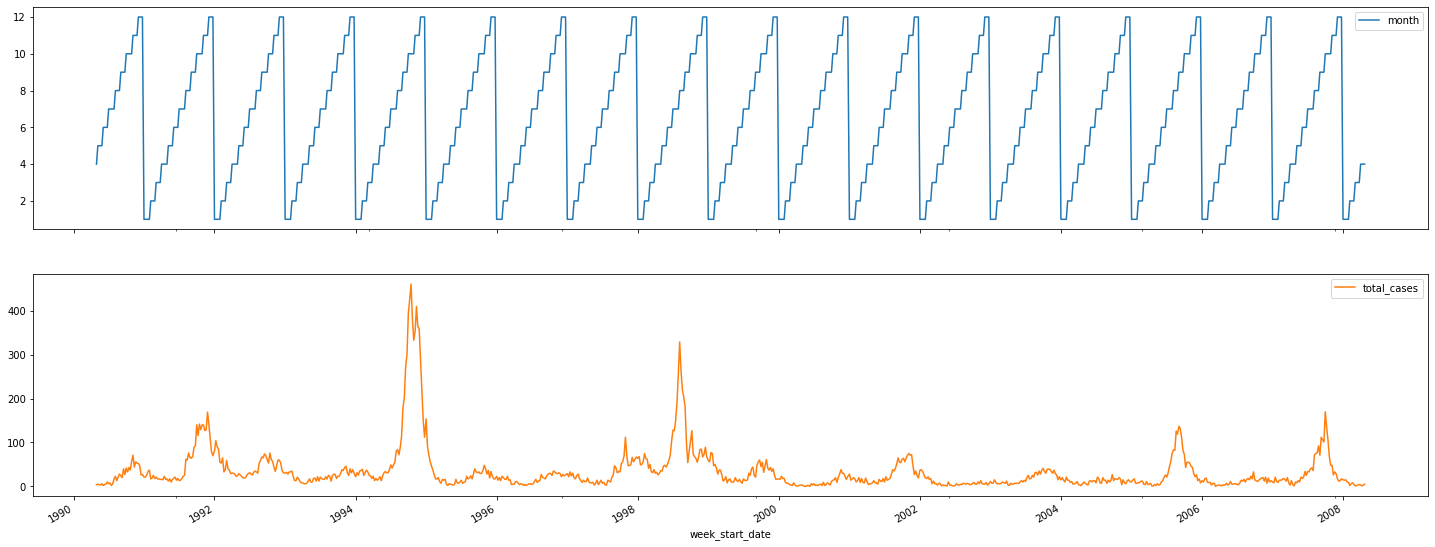

In [86]:
features.plot(subplots=True, figsize=(25,10));

In [87]:
desc = features[:TRAIN_SPLIT].describe()
desc

month  total_cases
count  676.000000   676.000000
mean     6.418639    38.656805
std      3.453506    57.422081
min      1.000000     0.000000
25%      3.750000    10.000000
50%      6.500000    23.000000
75%      9.000000    42.250000
max     12.000000   461.000000

In [88]:
dataset = features.values
data_mean = np.array(desc.T['mean'])
data_std = np.array(desc.T['std'])
data_mean,data_std

(array([ 6.41863905, 38.65680473]), array([ 3.45350603, 57.42208091]))

In [89]:
dataset[:3,:]

array([[4, 4],
       [5, 5],
       [5, 4]], dtype=int64)

In [90]:
dataset = standardize(dataset,data_mean,data_std)

In [91]:
dataset[:3,],dataset.shape

(array([[-0.70034308, -0.60354491],
        [-0.41078227, -0.58613001],
        [-0.41078227, -0.60354491]]),
 (936, 2))

In [92]:
past_history = 156
future_target = 52
STEP = 52
target_col = -1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, target_col], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, target_col],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [93]:
dataset[:3, target_col]

array([-0.60354491, -0.58613001, -0.60354491])

In [94]:
print ('Single window of past history : {} {}'.format(x_train_single[0],x_train_single.shape))

Single window of past history : [[-0.70034308 -0.60354491]
 [-0.70034308 -0.37715117]
 [-0.70034308 -0.25524684]] (520, 3, 2)


In [95]:
# .shuffle(BUFFER_SIZE)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [96]:
single_step_model = tf.keras.models.Sequential([
                                                tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]),
                                                tf.keras.layers.Dense(1)
                                              ])

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [97]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(52, 1)


In [98]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=52)

Train for 676 steps, validate for 52 steps
Epoch 1/5
676/676 [==============================] - 5s 7ms/step - loss: 0.4054 - val_loss: 0.4333
Epoch 2/5
676/676 [==============================] - 3s 4ms/step - loss: 0.3320 - val_loss: 0.4879
Epoch 3/5
676/676 [==============================] - 3s 5ms/step - loss: 0.2887 - val_loss: 0.4946
Epoch 4/5
676/676 [==============================] - 3s 5ms/step - loss: 0.2662 - val_loss: 0.5020
Epoch 5/5
676/676 [==============================] - 3s 5ms/step - loss: 0.2358 - val_loss: 0.5129


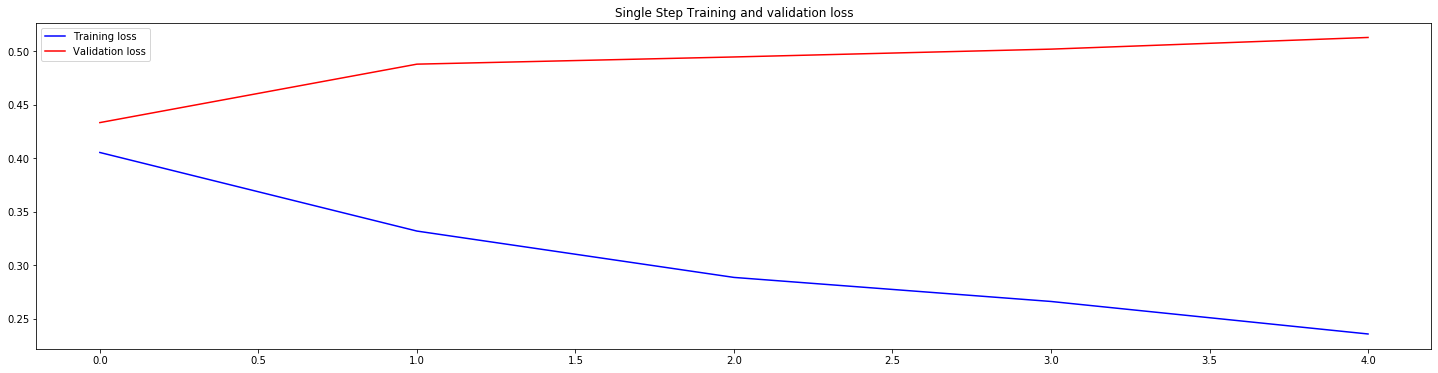

In [99]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

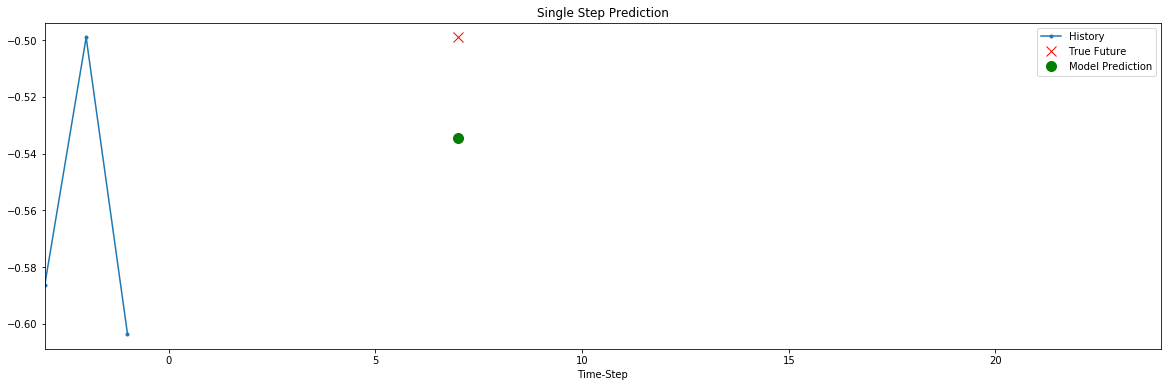

In [100]:
for x, y in val_data_single.take(1):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 7,
                   'Single Step Prediction')
  plot.show()

In [101]:
future_target = 52
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, target_col], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, target_col],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [102]:
print ('Single window of past history and shape : {} \n {}'.format(x_train_multi[0],x_train_multi[0].shape))
print ('\n Target to predict and shape : {} \n {}'.format(y_train_multi[0],y_train_multi[0].shape))

Single window of past history and shape : [[-0.70034308 -0.60354491]
 [-0.70034308 -0.37715117]
 [-0.70034308 -0.25524684]] 
 (3, 2)

 Target to predict and shape : [-0.46422568 -0.37715117 -0.49905549 -0.49905549 -0.35973626 -0.34232136
 -0.46422568 -0.29007665 -0.46422568 -0.30749155 -0.35973626 -0.39456607
 -0.39456607 -0.29007665 -0.37715117 -0.23783194 -0.27266174 -0.46422568
 -0.23783194 -0.18558723 -0.20300213 -0.35973626 -0.27266174 -0.27266174
 -0.16817232 -0.01143819 -0.046268    0.07563633  0.12788104 -0.13334252
 -0.23783194  0.02339162 -0.13334252 -0.01143819 -0.15075742 -0.29007665
 -0.13334252 -0.22041703 -0.0636829  -0.046268    0.00597671 -0.23783194
 -0.13334252 -0.02885309 -0.09851271 -0.23783194 -0.25524684 -0.35973626
 -0.27266174 -0.44681078 -0.35973626 -0.42939588] 
 (52,)


In [103]:
# .shuffle(BUFFER_SIZE)

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [104]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(25, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), 'b', label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'b',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'r',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [105]:
multi_step_model = tf.keras.models.Sequential([
                                               tf.keras.layers.LSTM(32, return_sequences=True, input_shape=x_train_multi.shape[-2:]),
                                               tf.keras.layers.LSTM(32, activation='relu'),
                                               tf.keras.layers.Dense(future_target)
                                             ])

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.1), loss='mae')

In [106]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(52, 52)


In [107]:
EPOCHS = 7
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=future_target)

Train for 676 steps, validate for 52 steps
Epoch 1/7
676/676 [==============================] - 8s 12ms/step - loss: 0.4354 - val_loss: 0.3244
Epoch 2/7
676/676 [==============================] - 5s 8ms/step - loss: 0.3995 - val_loss: 0.3432
Epoch 3/7
676/676 [==============================] - 6s 9ms/step - loss: 0.3765 - val_loss: 0.3400
Epoch 4/7
676/676 [==============================] - 6s 8ms/step - loss: 0.3545 - val_loss: 0.3575
Epoch 5/7
676/676 [==============================] - 6s 9ms/step - loss: 0.3333 - val_loss: 0.3574
Epoch 6/7
676/676 [==============================] - 5s 8ms/step - loss: 0.3164 - val_loss: 0.3478
Epoch 7/7
676/676 [==============================] - 5s 8ms/step - loss: 0.3030 - val_loss: 0.3581


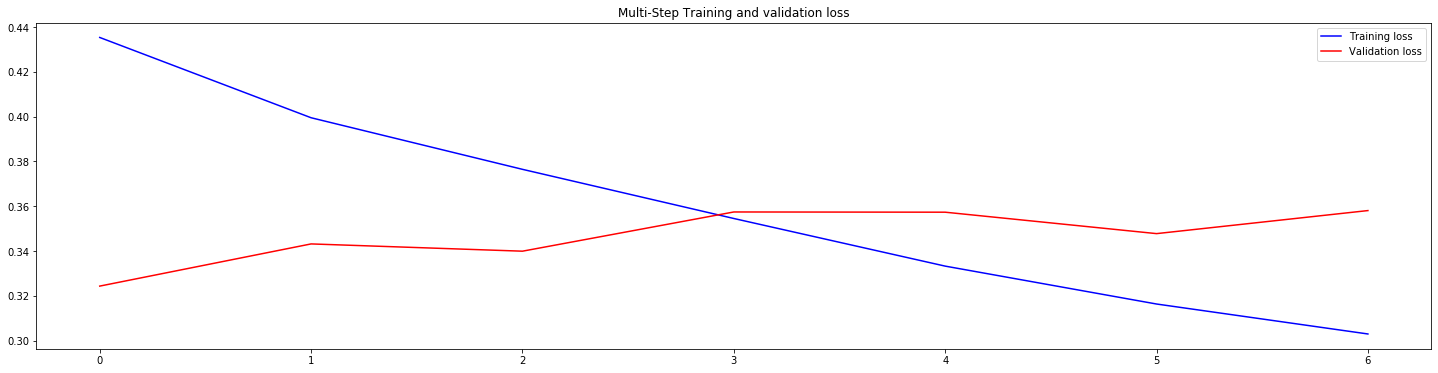

In [108]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

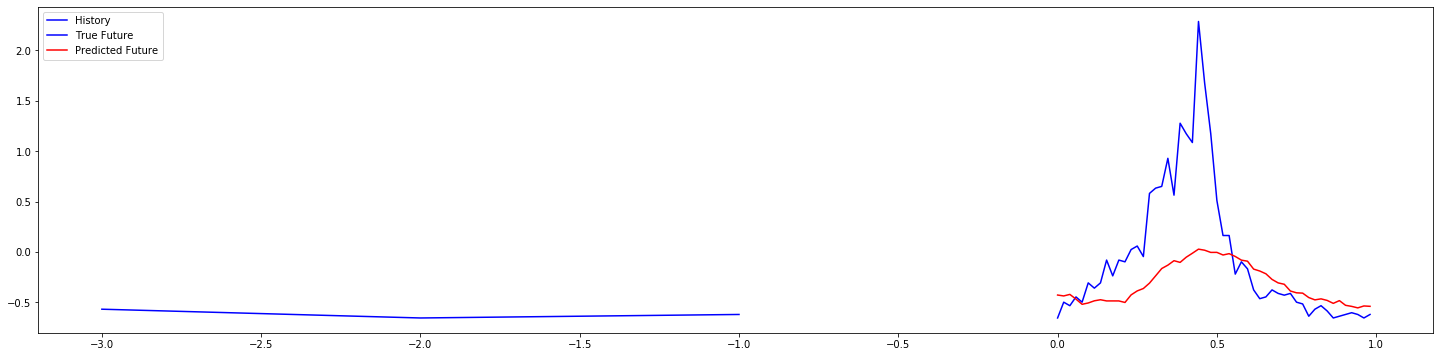

In [109]:
for x, y in val_data_multi.take(1):
  multi_step_plot(x[-1], y[-1], multi_step_model.predict(x)[-1])

In [110]:
sj_pred_ = inv_standardize(multi_step_model.predict(x)[-1], data_mean[target_col], data_std[target_col]).astype('int64')
sj_pred_

array([14, 13, 14, 11,  8,  9, 10, 11, 10, 10, 10,  9, 14, 16, 17, 20, 25,
       29, 31, 33, 32, 35, 37, 40, 39, 38, 38, 36, 37, 36, 33, 33, 28, 27,
       26, 22, 20, 20, 16, 15, 15, 12, 11, 11, 11,  9, 10,  8,  7,  6,  7,
        7], dtype=int64)

In [111]:
sj_mae = mae(sj_train_labels[-52:].values, sj_pred_)
print(sj_mae)

23.307692307692307


In [112]:
sj_predictions = pd.DataFrame(sj_pred_, index=features.index[-future_target:], columns=['TensorFlow_Predictions'])
sj_predictions.head()

TensorFlow_Predictions
week_start_date                        
2007-04-30                           14
2007-05-07                           13
2007-05-14                           14
2007-05-21                           11
2007-05-28                            8

In [167]:
sj_predictions.to_csv('sj_predictions.csv')

# Iquitos predictions below


In [114]:
data = iq_train_labels['total_cases']
data.index = iq_train_features['week_start_date']
data.head()

week_start_date
2000-07-01    0
2000-07-08    0
2000-07-15    0
2000-07-22    0
2000-07-29    0
Name: total_cases, dtype: int64

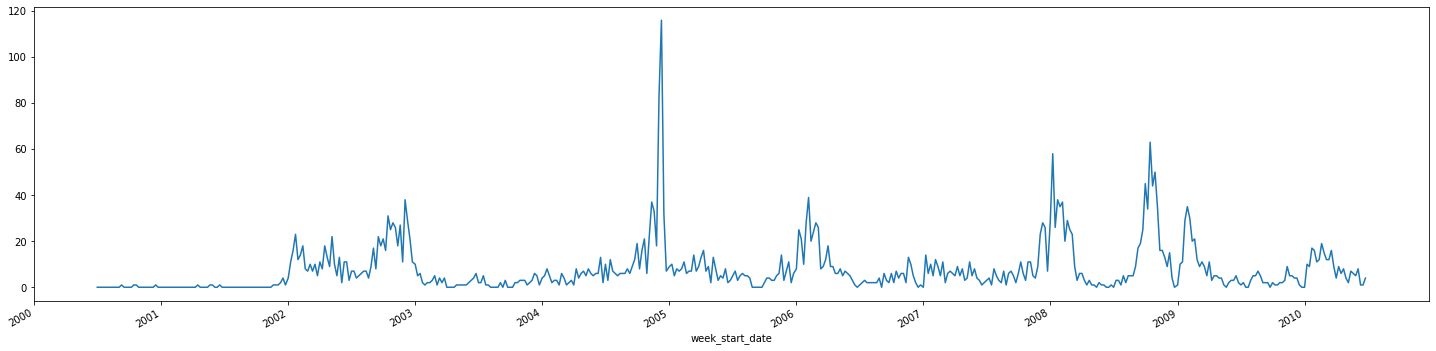

In [115]:
data.plot(figsize=(25,6),subplots=True);

In [116]:
TRAIN_SPLIT = len(data) - 208

In [117]:
desc = data[:TRAIN_SPLIT].describe()
desc

count    312.000000
mean       6.814103
std       10.780955
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      116.000000
Name: total_cases, dtype: float64

In [118]:
data = data.values

In [119]:
train_mean = np.array(desc.T['mean'])
train_std = np.array(desc.T['std'])

In [120]:
data = standardize(data,train_mean,train_std)

In [121]:
past_history = 52
future_target = 0

x_train, y_train = univariate_data(data, 0, TRAIN_SPLIT, past_history, future_target)
x_val, y_val = univariate_data(data, TRAIN_SPLIT, None, past_history, future_target)

In [122]:
print ('Single window of past history')
print (x_train[0])
print ('\n Target to predict')
print (y_train[0])
print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("x_val shape:{}".format(x_val.shape))
print("y_val shape:{}".format(y_val.shape))

Single window of past history
[[-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.53929382]
 [-0.63204998]
 [-0.63204998]
 [-0.53929382]
 [-0.63204998]]

 Target to predict
-0.6320499798886229
x_train shape:(260, 52, 1)
y_train shape:(260,)
x_val shape:(156, 52, 1)
y_val shape:(156,)


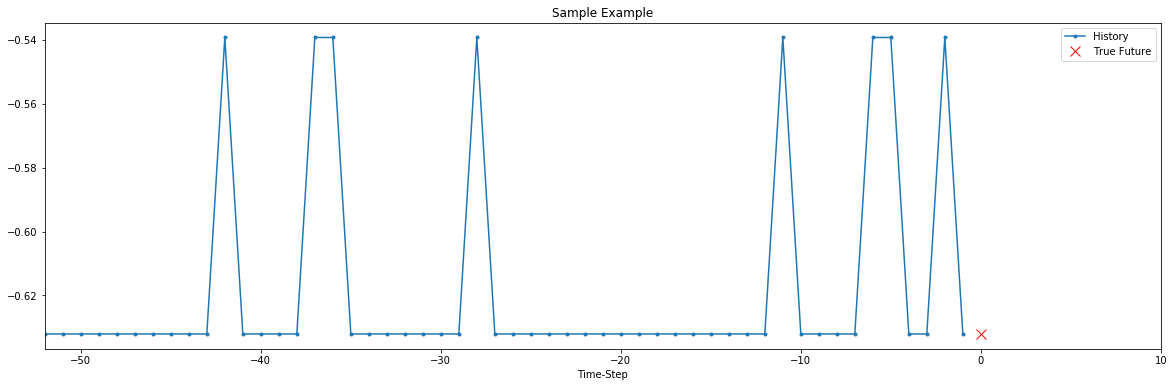

In [123]:
show_plot([x_train[0], y_train[0]], 0, 'Sample Example');

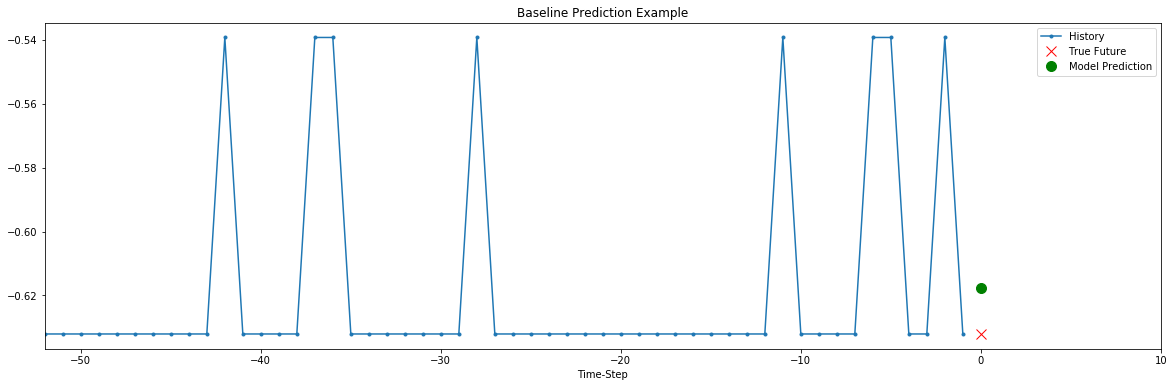

In [124]:
show_plot([x_train[0], y_train[0], baseline(x_train[0])], 0,
           'Baseline Prediction Example');

In [125]:
BATCH_SIZE = 10000
# BUFFER_SIZE = .shuffle(BUFFER_SIZE)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [126]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=x_train.shape[-2:], activation='relu'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [127]:
for x, y in val_data.take(1):
    print(simple_lstm_model.predict(x).shape)

(156, 1)


In [128]:
EVALUATION_INTERVAL = TRAIN_SPLIT
EPOCHS = 5

single_step_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_data, validation_steps=26)

Train for 312 steps, validate for 26 steps
Epoch 1/5
312/312 [==============================] - 11s 37ms/step - loss: 0.3729 - val_loss: 0.6988
Epoch 2/5
312/312 [==============================] - 10s 32ms/step - loss: 0.3163 - val_loss: 0.8029
Epoch 3/5
312/312 [==============================] - 10s 32ms/step - loss: 0.2907 - val_loss: 0.8852
Epoch 4/5
312/312 [==============================] - 11s 34ms/step - loss: 0.2621 - val_loss: 1.0288
Epoch 5/5
312/312 [==============================] - 10s 32ms/step - loss: 0.2304 - val_loss: 1.1819


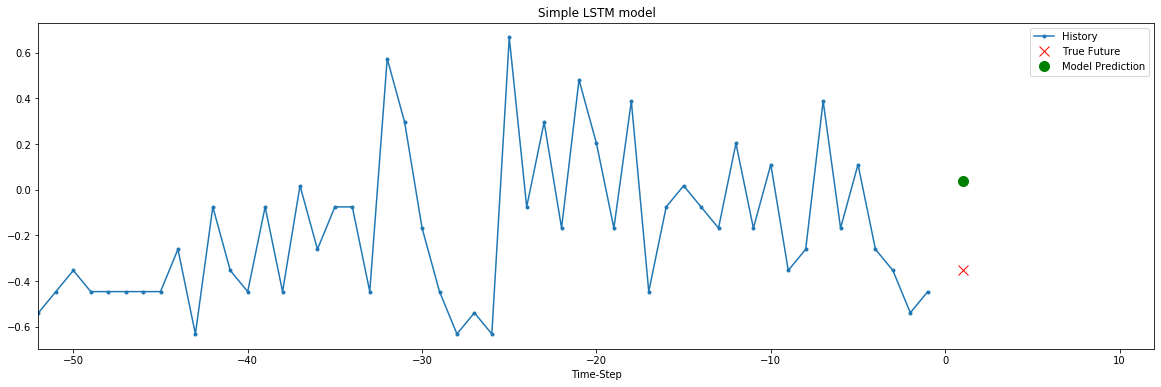

In [129]:
for x, y in val_data.take(1):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 1, 'Simple LSTM model')
  plot.show()

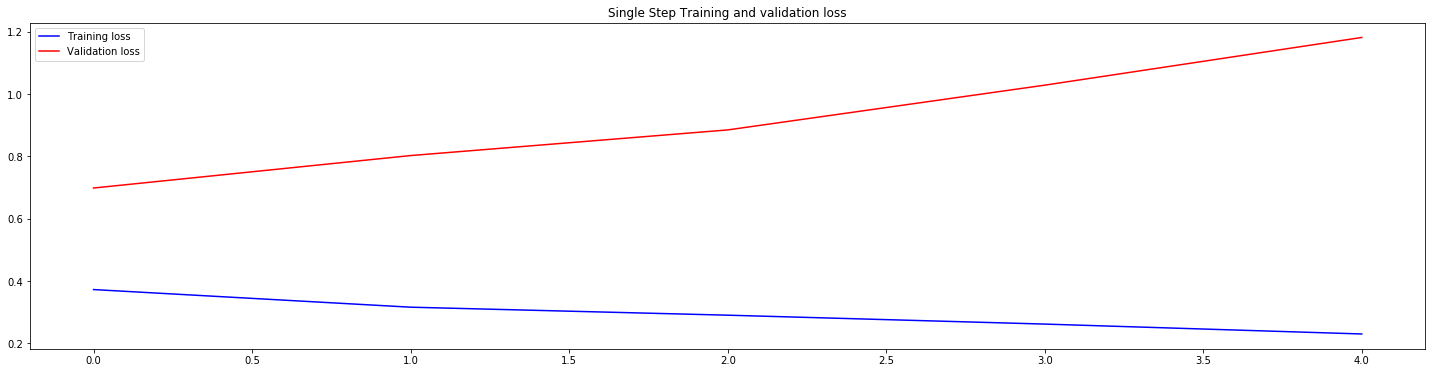

In [130]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [131]:
iq_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
(2000, 26)      2000-07-01  0.192886  0.132257  0.340886  0.247200   
(2000, 27)      2000-07-08  0.216833  0.276100  0.289457  0.241657   
(2000, 28)      2000-07-15  0.176757  0.173129  0.204114  0.128014   
(2000, 29)      2000-07-22  0.227729  0.145429  0.254200  0.200314   
(2000, 30)      2000-07-29  0.328643  0.322129  0.254371  0.361043   

            precipitation_amt_mm  reanalysis_air_temp_k  \
(2000, 26)                 25.41             296.740000   
(2000, 27)                 60.61             296.634286   
(2000, 28)                 55.52             296.415714   
(2000, 29)                  5.60             295.357143   
(2000, 30)                 62.76             296.432857   

            reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
(2000, 26)             298.450000                   295.184286   
(2000, 27)             298.428571                   295.358571   
(2000, 28)             297.392857                   295.622857   
(2000, 29)             296.228571                   292.797143   
(2000, 30)             297.635714                   293.957143   

            reanalysis_max_air_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
(2000, 26)                      307.3  ...                            43.19   
(2000, 27)                      306.6  ...                            46.00   
(2000, 28)                      304.5  ...                            64.77   
(2000, 29)                      303.6  ...                            23.96   
(2000, 30)                      307.0  ...                            31.80   

            reanalysis_relative_humidity_percent  \
(2000, 26)                             92.418571   
(2000, 27)                             93.581429   
(2000, 28)                             95.848571   
(2000, 29)                             87.234286   
(2000, 30)                             88.161429   

            reanalysis_sat_precip_amt_mm  \
(2000, 26)                         25.41   
(2000, 27)                         60.61   
(2000, 28)                         55.52   
(2000, 29)                          5.60   
(2000, 30)                         62.76   

            reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
(2000, 26)                              16.651429           8.928571   
(2000, 27)                              16.862857          10.314286   
(2000, 28)                              17.120000           7.385714   
(2000, 29)                              14.431429           9.114286   
(2000, 30)                              15.444286           9.500000   

            station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
(2000, 26)           26.400000                10.775000                32.5   
(2000, 27)           26.900000                11.566667                34.0   
(2000, 28)           26.800000                11.466667                33.0   
(2000, 29)           25.766667                10.533333                31.5   
(2000, 30)           26.600000                11.480000                33.3   

            station_min_temp_c  station_precip_mm  
(2000, 26)                20.7                3.0  
(2000, 27)                20.8               55.6  
(2000, 28)                20.7               38.1  
(2000, 29)                14.7               30.0  
(2000, 30)                19.1                4.0  

[5 rows x 21 columns]

In [132]:
iq_train_features.loc[:,'month'] = iq_train_features.week_start_date.dt.month

C:\Users\bryan\Anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\bryan\Anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [133]:
[*iq_train_features.columns]

['week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'month']

In [134]:
features_considered = ['month']
# 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_air_temp_k', 'precipitation_amt_mm', 

In [135]:
len(iq_train_features[features_considered]),len(iq_train_labels)

(520, 520)

In [136]:
features = iq_train_features[features_considered]
features.loc[:,'total_cases'] = iq_train_labels.values
features.index = iq_train_features['week_start_date']
features.head()

month  total_cases
week_start_date                    
2000-07-01           7            0
2000-07-08           7            0
2000-07-15           7            0
2000-07-22           7            0
2000-07-29           7            0

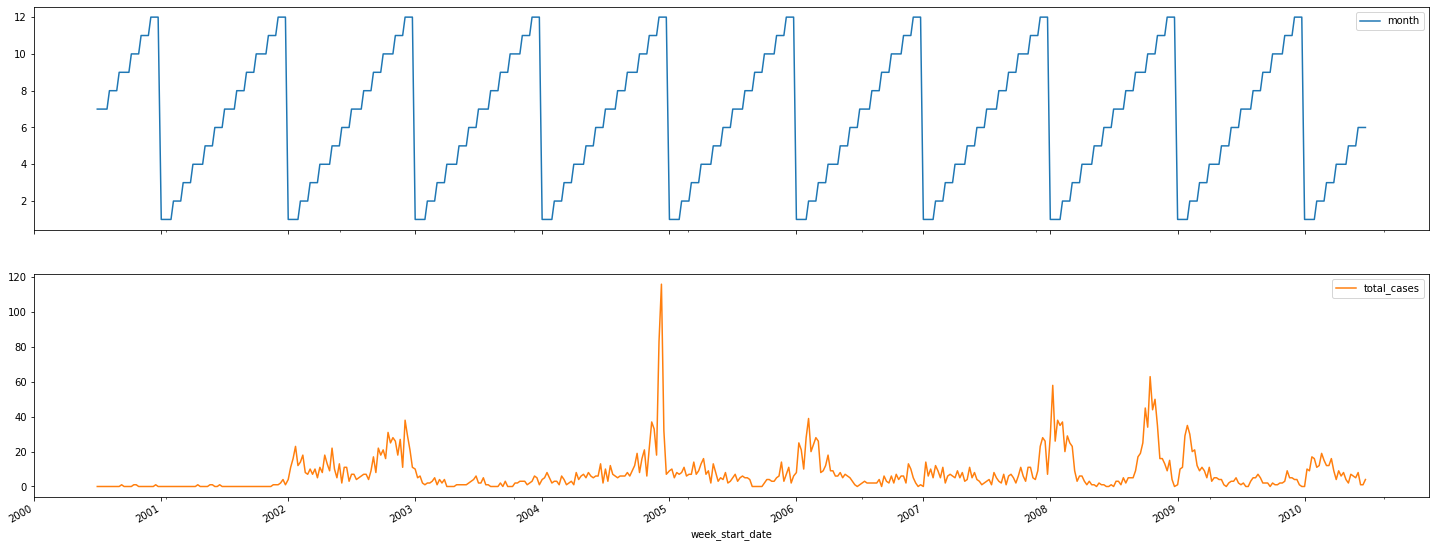

In [137]:
features.plot(subplots=True, figsize=(25,10));


In [138]:
desc = features[:TRAIN_SPLIT].describe()
desc

month  total_cases
count  312.000000   312.000000
mean     6.416667     6.814103
std      3.454729    10.780955
min      1.000000     0.000000
25%      3.750000     0.000000
50%      6.500000     4.000000
75%      9.000000     8.000000
max     12.000000   116.000000

In [139]:
dataset = features.values
data_mean = np.array(desc.T['mean'])
data_std = np.array(desc.T['std'])
data_mean,data_std

(array([6.41666667, 6.81410256]), array([ 3.45472943, 10.78095527]))

In [140]:
dataset[:3,:]

array([[7, 0],
       [7, 0],
       [7, 0]], dtype=int64)

In [141]:
dataset = standardize(dataset,data_mean,data_std)

In [142]:
dataset[:3,],dataset.shape

(array([[ 0.16885066, -0.63204998],
        [ 0.16885066, -0.63204998],
        [ 0.16885066, -0.63204998]]),
 (520, 2))

In [143]:
past_history = 104
future_target = 52
STEP = 104
target_col = -1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, target_col], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, target_col],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [144]:
dataset[:3, target_col]

array([-0.63204998, -0.63204998, -0.63204998])

In [145]:
print ('Single window of past history : {} {}'.format(x_train_single[0],x_train_single.shape))

Single window of past history : [[ 0.16885066 -0.63204998]] (208, 1, 2)


In [146]:
# .shuffle(BUFFER_SIZE)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [147]:
single_step_model = tf.keras.models.Sequential([
                                                tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]),
                                                tf.keras.layers.Dense(1)
                                              ])

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [148]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(52, 1)


In [149]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=52)

Train for 312 steps, validate for 52 steps
Epoch 1/5
312/312 [==============================] - 3s 9ms/step - loss: 0.4531 - val_loss: 0.2777
Epoch 2/5
312/312 [==============================] - 1s 3ms/step - loss: 0.4451 - val_loss: 0.2610
Epoch 3/5
312/312 [==============================] - 1s 2ms/step - loss: 0.4412 - val_loss: 0.2511
Epoch 4/5
312/312 [==============================] - 1s 2ms/step - loss: 0.4366 - val_loss: 0.2504
Epoch 5/5
312/312 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.2618


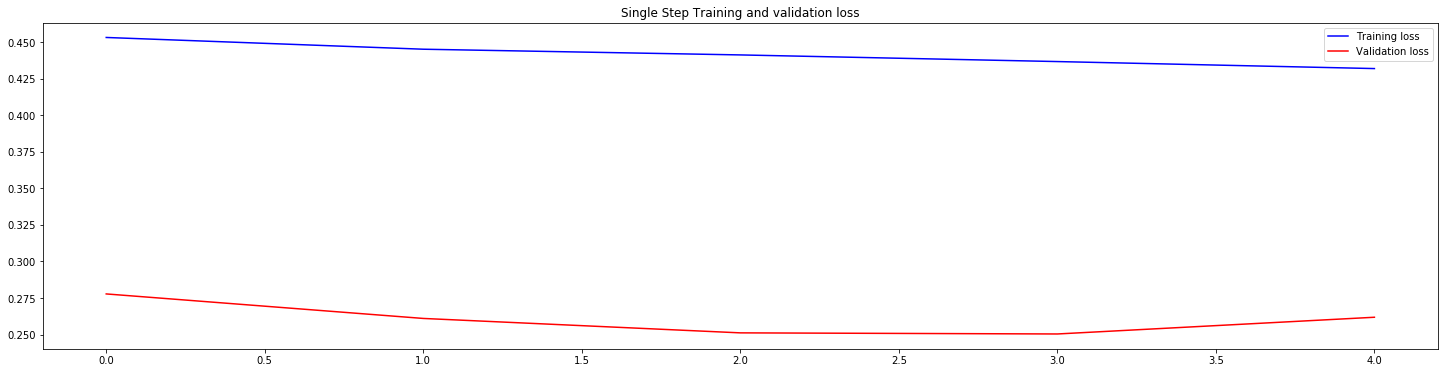

In [150]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

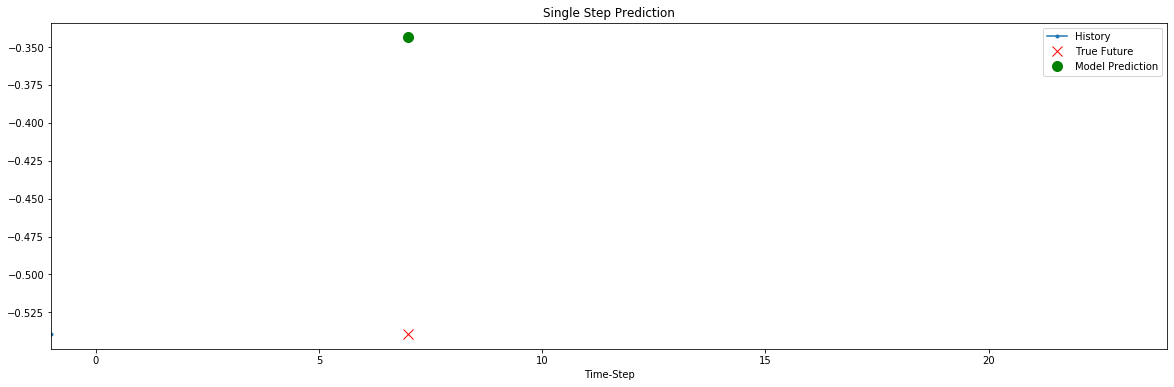

In [151]:
for x, y in val_data_single.take(1):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 7,
                   'Single Step Prediction')
  plot.show()

In [152]:
future_target = 52
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, target_col], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, target_col],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [153]:
print ('Single window of past history and shape : {} \n {}'.format(x_train_multi[0],x_train_multi[0].shape))
print ('\n Target to predict and shape : {} \n {}'.format(y_train_multi[0],y_train_multi[0].shape))

Single window of past history and shape : [[ 0.16885066 -0.63204998]] 
 (1, 2)

 Target to predict and shape : [ 0.01724313  0.01724313 -0.26102534 -0.16826919 -0.07551303  0.01724313
  0.01724313 -0.26102534  0.20275545  0.94480472  0.10999929  1.40858551
  1.03756088  1.31582936  0.85204856  2.24339094  1.68685399  1.96512247
  1.77961015  1.03756088  1.87236631  0.38826777  2.89268406  2.05787863
  1.31582936  0.38826777  0.29551161 -0.16826919 -0.07551303 -0.44653766
 -0.53929382 -0.44653766 -0.44653766 -0.3537815  -0.16826919 -0.53929382
 -0.26102534 -0.44653766 -0.26102534 -0.63204998 -0.63204998 -0.63204998
 -0.63204998 -0.53929382 -0.53929382 -0.53929382 -0.53929382 -0.53929382
 -0.44653766 -0.3537815  -0.26102534 -0.07551303] 
 (52,)


In [154]:
# .shuffle(BUFFER_SIZE)

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [155]:
multi_step_model = tf.keras.models.Sequential([
                                               tf.keras.layers.LSTM(32, return_sequences=True, input_shape=x_train_multi.shape[-2:]),
                                               tf.keras.layers.LSTM(16, activation='elu'),
                                               tf.keras.layers.Dense(future_target)
                                             ])

                                              

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [156]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(52, 52)


In [157]:
EPOCHS = 7
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=future_target)

Train for 312 steps, validate for 52 steps
Epoch 1/7
312/312 [==============================] - 4s 12ms/step - loss: 0.4933 - val_loss: 0.5645
Epoch 2/7
312/312 [==============================] - 1s 3ms/step - loss: 0.4637 - val_loss: 0.5375
Epoch 3/7
312/312 [==============================] - 1s 3ms/step - loss: 0.4537 - val_loss: 0.5349
Epoch 4/7
312/312 [==============================] - 1s 3ms/step - loss: 0.4447 - val_loss: 0.5376
Epoch 5/7
312/312 [==============================] - 1s 3ms/step - loss: 0.4386 - val_loss: 0.5423
Epoch 6/7
312/312 [==============================] - 1s 3ms/step - loss: 0.4346 - val_loss: 0.5451
Epoch 7/7
312/312 [==============================] - 1s 3ms/step - loss: 0.4313 - val_loss: 0.5479


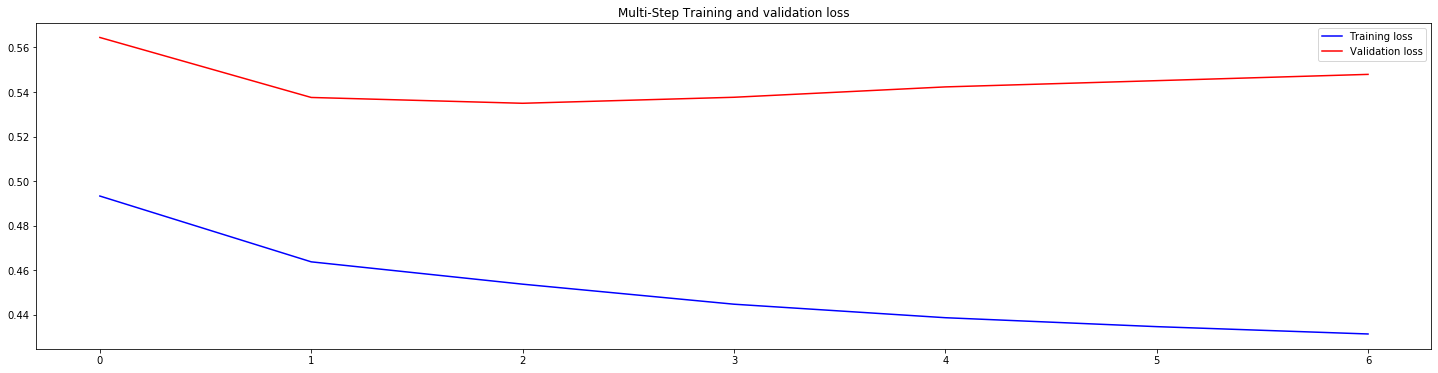

In [158]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

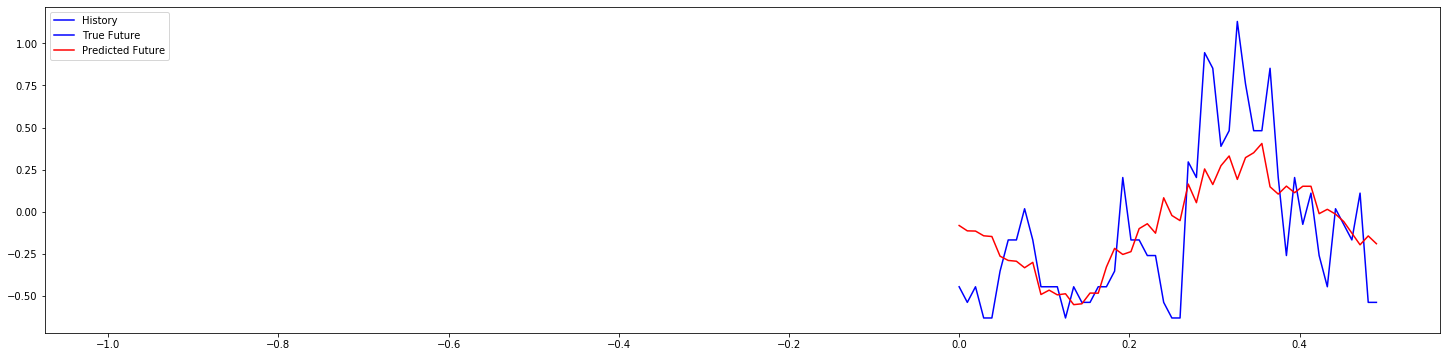

In [159]:
for x, y in val_data_multi.take(1):
  multi_step_plot(x[-1], y[-1], multi_step_model.predict(x)[-1])

In [160]:
iq_pred_ = inv_standardize(multi_step_model.predict(x)[-1], data_mean[target_col], data_std[target_col]).astype('int64')

In [161]:
iq_predictions = pd.DataFrame(iq_pred_, index=features.index[-52:], columns=['TensorFlow_Predictions'])
iq_predictions.head()

TensorFlow_Predictions
week_start_date                        
2009-07-02                            5
2009-07-09                            5
2009-07-16                            5
2009-07-23                            5
2009-07-30                            5

In [162]:
iq_predictions.to_csv('iq_predictions.csv')

In [163]:
iq_mae = mae(iq_train_labels[-52:].values, iq_pred_)
print(iq_mae)

2.7884615384615383


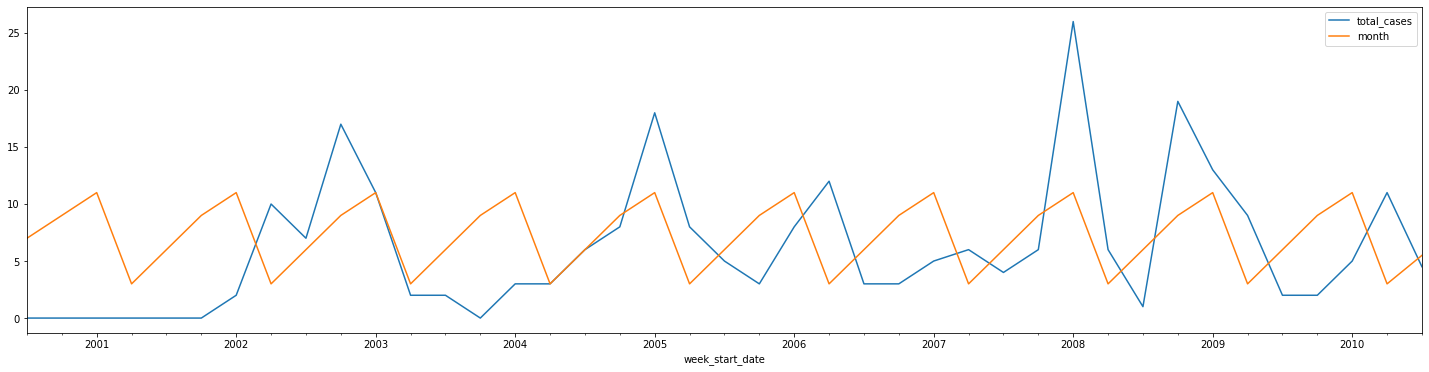

In [164]:
features[['total_cases','month']].resample("3m").median().plot(figsize=(25,6));

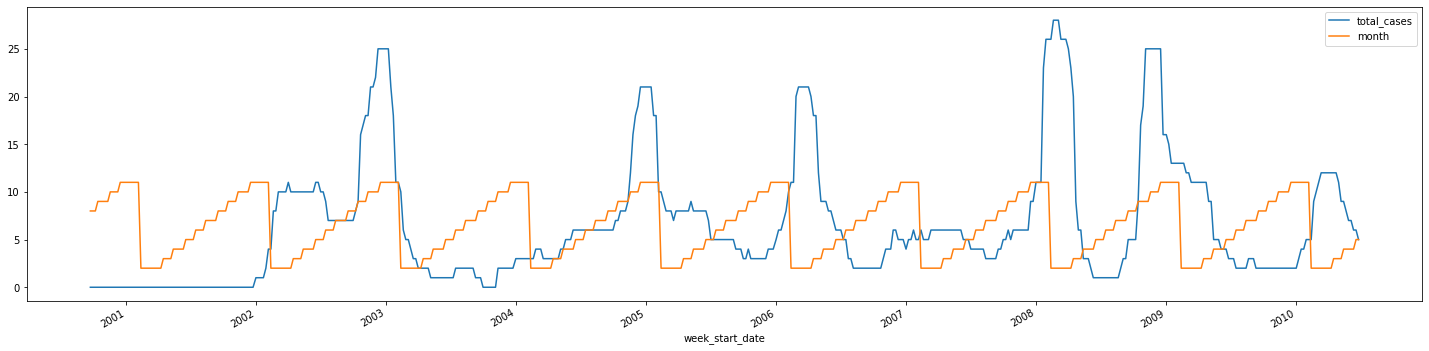

In [165]:
features[['total_cases','month']].rolling(13).median().plot(figsize=(25,6));

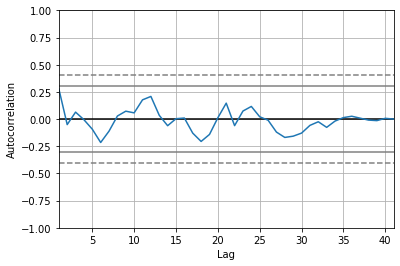

In [166]:
pd.plotting.autocorrelation_plot(features[['total_cases']].resample("3m").median());